In [0]:
%sh
pwd
ls
pwd

/databricks/driver
conf
eventlogs
logs
/databricks/driver

In [0]:
%sh
pip install nltk
pip install fasttext
pip install gensim
pip install python-Levenshtein
pip install tensorflow
pip install xgboost
pip install lightgbm
pip install catboost
pip install prettytable

Requirement already satisfied: nltk in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (3.5)
Requirement already satisfied: tqdm in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from nltk) (4.50.2)
Requirement already satisfied: regex in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from nltk) (2020.10.15)
Requirement already satisfied: click in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from nltk) (7.1.2)
Requirement already satisfied: joblib in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from nltk) (0.17.0)
Requirement already satisfied: fasttext in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (0.9.2)
Requirement already satisfied: setuptools>=0.7.0 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from fasttext) (50.3.1.post20201107)
Requirement already satisfied: pybind11>=2.2 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from fasttext) (2.6.2)
Requirement already satisfied: numpy in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from fasttext) (1.19.2)
Requirement already satisfied: gensim in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (4.0.1)
Requirement already satisfied: scipy>=0.18.1 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from gensim) (1.5.2)
Requirement already satisfied: numpy>=1.11.3 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from gensim) (1.19.2)
Requirement already satisfied: smart-open>=1.8.1 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from gensim) (5.0.0)
Requirement already satisfied: python-Levenshtein in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (0.12.2)
Requirement already satisfied: setuptools in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from python-Levenshtein) (50.3.1.post20201107)
Requirement already satisfied: tensorflow in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (2.5.0)
Requirement already satisfied: tensorboard~=2.5 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from tensorflow) (2.5.0)
Requirement already satisfied: wrapt~=1.12.1 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from tensorflow) (1.12.1)
Requirement already satisfied: typing-extensions~=3.7.4 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from tensorflow) (3.7.4.3)
Requirement already satisfied: grpcio~=1.34.0 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from tensorflow) (1.34.1)
Requirement already satisfied: keras-nightly~=2.5.0.dev in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from tensorflow) (2.5.0.dev2021032900)
Requirement already satisfied: numpy~=1.19.2 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from tensorflow) (1.19.2)
Requirement already satisfied: h5py~=3.1.0 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from tensorflow) (3.1.0)
Requirement already satisfied: opt-einsum~=3.3.0 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from tensorflow) (3.3.0)
Requirement already satisfied: six~=1.15.0 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from tensorflow) (1.15.0)
Requirement already satisfied: termcolor~=1.1.0 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from tensorflow) (1.1.0)
Requirement already satisfied: protobuf>=3.9.2 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from tensorflow) (3.13.0)
Requirement already satisfied: wheel~=0.35 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from tensorflow) (0.35.1)
Requirement already satisfied: google-pasta~=0.2 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from tensorflow) (0.2.0)
Requirement already satisfied: astunparse~=1.6.3 in /dat

In [0]:
import pickle
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.metrics import log_loss,accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
nltk.download('rslp')
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import Normalizer
from tqdm import tqdm
import re
from sklearn.model_selection import train_test_split
import fasttext.util
from gensim.models import FastText
from gensim.test.utils import datapath
fasttext.util.download_model('pt', if_exists='ignore')  #Portuguese
from gensim.models.fasttext import load_facebook_model
ft_model = load_facebook_model('/databricks/driver/cc.pt.300.bin')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data] Unzipping stemmers/rslp.zip.
Downloading https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.pt.300.bin.gz
 (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.00%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.01%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.02%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.03%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.04%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> ] (0.05%) [> 

In [0]:
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [0]:
from prettytable import PrettyTable 

In [0]:
sp = (spark.read.option("header","true").csv("/FileStore/shared_uploads/ramtirtha.chaitanya@gmail.com/olist_customers_dataset.csv"))
df_customers = sp.select("*").toPandas()
sp1 = (spark.read.option("header","true").csv("/FileStore/shared_uploads/ramtirtha.chaitanya@gmail.com/olist_geolocation_dataset.csv"))
df_geolocation = sp1.select("*").toPandas()
sp2 = (spark.read.option("header","true").csv("/FileStore/shared_uploads/ramtirtha.chaitanya@gmail.com/olist_orders_dataset.csv"))
df_orders = sp2.select("*").toPandas()
sp3 = (spark.read.option("header","true").csv("/FileStore/shared_uploads/ramtirtha.chaitanya@gmail.com/olist_products_dataset.csv"))
df_products = sp3.select("*").toPandas()
sp4 = (spark.read.option("header","true").csv("/FileStore/shared_uploads/ramtirtha.chaitanya@gmail.com/olist_sellers_dataset.csv"))
df_sellers = sp4.select("*").toPandas()
sp5 = (spark.read.option("header","true").csv("/FileStore/shared_uploads/ramtirtha.chaitanya@gmail.com/olist_order_items_dataset.csv"))
df_order_items = sp5.select("*").toPandas()
sp6 = (spark.read.option("header","true").csv("/FileStore/shared_uploads/ramtirtha.chaitanya@gmail.com/olist_order_payments_dataset.csv"))
df_order_payments = sp6.select("*").toPandas()
sp7 = (spark.read.option("header","true").csv("/FileStore/shared_uploads/ramtirtha.chaitanya@gmail.com/olist_order_reviews_dataset.csv"))
df_order_reviews = sp7.select("*").toPandas()
sp8 = (spark.read.option("header","true").csv("/FileStore/shared_uploads/ramtirtha.chaitanya@gmail.com/product_category_name_translation.csv"))
df_products_english = sp8.select("*").toPandas()

In [0]:
#Olist is an e-commerce site of Brazil which provides a platform to connect merchants and their product to the main marketplace of Brazil.
#Olist released this dataset on kaggle in Nov 2018. The data-set has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allow viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. 
#A Geo-location data-set that relates Brazilian zip codes to lat/long coordinates has also been released.
#Olist is one of the largest retail stores in Brazil.

In [0]:
# It provides good services for the merchants to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.
#Its business is based on interaction between consumer , olist store and the seller.
#At first an order is made by the consumer on the olist site.This order is received by olist store ,based on the information of the order (like product category,geolocation,mode of payment e.t.c) a notification is forwarded to the sellers.
#After that, product is received from the seller and delivered to the consumer within the estimated delivery time. Once the customer receives the product, or if the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

In [0]:
#For a given historical data of the customer predict the review score for the next order or purchase.
#This problem statement can be further modified into to predict the customer satisfaction (positive or negative) for the purchase made from the brazilain e-commerce site Olist.
#So we make classification of customer whether he is happy or angry with the service(delivery) and product purchased, etc. 

In [0]:
datasets = [df_customers,df_geolocation,df_orders,df_products,df_sellers,df_order_items,df_order_payments,df_order_reviews,df_products_english]
titles = ['customers','geolocations','orders','products','sellers','items','payments','reviews','product_category_translation']

info_df = pd.DataFrame({},)
info_df['dataset']= titles

info_df['no_of_columns']= [len(df.columns) for df in datasets ]
info_df['columns_name']= [', '.join(list(i.columns)) for i in datasets] 
info_df['no_of_rows'] = [len(df) for df in datasets]

In [0]:
display(info_df)

dataset,no_of_columns,columns_name,no_of_rows
customers,5,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441
geolocations,5,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163
orders,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441
products,9,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951
sellers,4,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095
items,7,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650
payments,5,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886
reviews,7,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",105189
product_category_translation,2,"product_category_name, product_category_name_english",71


In [0]:
#from above dataframe , we can see that highest no of columns are in products.
#highest no of rows are in geolocations

In [0]:
df_customers.isnull().sum()

Out[14]: customer_id 0
customer_unique_id 0
customer_zip_code_prefix 0
customer_city 0
customer_state 0
dtype: int64

In [0]:
df_geolocation.isnull().sum()

Out[15]: geolocation_zip_code_prefix 0
geolocation_lat 0
geolocation_lng 0
geolocation_city 0
geolocation_state 0
dtype: int64

In [0]:
df_orders.isnull().sum()

Out[16]: order_id 0
customer_id 0
order_status 0
order_purchase_timestamp 0
order_approved_at 160
order_delivered_carrier_date 1783
order_delivered_customer_date 2965
order_estimated_delivery_date 0
dtype: int64

In [0]:
#In orders, some columns have null values.

In [0]:
df_products.isnull().sum()

Out[18]: product_id 0
product_category_name 610
product_name_lenght 610
product_description_lenght 610
product_photos_qty 610
product_weight_g 2
product_length_cm 2
product_height_cm 2
product_width_cm 2
dtype: int64

In [0]:
#In products, all columns have some null values.

In [0]:
df_sellers.isnull().sum()

Out[20]: seller_id 0
seller_zip_code_prefix 0
seller_city 0
seller_state 0
dtype: int64

In [0]:
df_order_items.isnull().sum()

Out[21]: order_id 0
order_item_id 0
product_id 0
seller_id 0
shipping_limit_date 0
price 0
freight_value 0
dtype: int64

In [0]:
df_order_payments.isnull().sum()

Out[22]: order_id 0
payment_sequential 0
payment_type 0
payment_installments 0
payment_value 0
dtype: int64

In [0]:
df_order_reviews.isnull().sum()

Out[23]: review_id 1
order_id 2330
review_score 2497
review_comment_title 93013
review_comment_message 63321
review_creation_date 9164
review_answer_timestamp 9187
dtype: int64

In [0]:
#Reviews has the most the null values of all datasets.

In [0]:
df_products_english.isnull().sum()

Out[25]: product_category_name 0
product_category_name_english 0
dtype: int64

In [0]:
#Before merging datasets, I will drop useless columns from reviews dataset.

In [0]:
reviews = df_order_reviews.drop(['review_comment_title','review_creation_date','review_id','review_answer_timestamp'],axis=1)

In [0]:
[df_customers,df_geolocation,df_orders,df_products,df_sellers,df_order_items,df_order_payments,df_order_reviews,df_products_english]

df = pd.merge(df_orders,df_order_payments, on="order_id")
df = df.merge(df_customers, on="customer_id")
df = df.merge(df_order_items, on="order_id")
df = df.merge(df_products, on="product_id")
df = df.merge(df_products_english, on="product_category_name")
df = df.merge(reviews, on="order_id")
df.head()

Out[28]:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40,268,4,500,19,8,13,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40,268,4,500,19,8,13,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40,268,4,500,19,8,13,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,03366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40,268,4,500,19,8,13,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,02290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40,268,4,500,19,8,13,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [0]:
print('No. of rows in df',len(df))
print('No. of cols in df',len(df.columns))

No. of rows in df 116581
No. of cols in df 33

In [0]:
df.isnull().sum()

Out[183]: order_id 0
customer_id 0
order_status 0
order_purchase_timestamp 0
order_approved_at 0
order_delivered_customer_date 0
order_estimated_delivery_date 0
payment_sequential 0
payment_type 0
payment_installments 0
payment_value 0
customer_unique_id 0
customer_zip_code_prefix 0
customer_city 0
customer_state 0
order_item_id 0
product_id 0
seller_id 0
shipping_limit_date 0
price 0
freight_value 0
product_category_name 0
product_name_lenght 0
product_description_lenght 0
product_photos_qty 0
product_weight_g 0
product_length_cm 0
product_height_cm 0
product_width_cm 0
product_category_name_english 0
review_score 0
review_comment_message 0
order_purchase_year 0
order_purchase_month 0
order_purchase_month_name 0
order_purchase_year_month 0
order_purchase_date 0
order_purchase_month_yr 0
order_purchase_day 0
order_purchase_dayofweek 0
order_purchase_dayofweek_name 0
order_purchase_hour 0
order_purchase_time_day 0
day_to_delivery 0
words_per_review 0
dtype: int64

In [0]:
#order of timestamps :
#order_purchase_timestamp --> order_approved_at -->  order_delivered_carrier_date --> order_delivered_customer_date --> order_estimated_delivery_date

#In this data, there is null values at order_approved_at, prder_delivered_carrier_date, order_delivered_customer_date.

#null-values in order_approved_at can be replaced by order_purchase_timestamp and null-values in order_delivered_customer_date can be replaced by order_estimated_delivery_date

#I don't think order_carrier_date carries meaningful data, hence I drop it

In [0]:
index = (df[df['order_delivered_customer_date'].isnull() == True].index.values)

df["order_approved_at"].fillna(df["order_purchase_timestamp"], inplace=True)
df["order_delivered_customer_date"].fillna(df["order_estimated_delivery_date"], inplace=True)

df.drop(labels='order_delivered_carrier_date',axis=1,inplace=True)

In [0]:
df.head()

Out[33]:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40,268,4,500,19,8,13,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40,268,4,500,19,8,13,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40,268,4,500,19,8,13,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,03366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40,268,4,500,19,8,13,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,02290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40,268,4,500,19,8,13,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [0]:
#verifying whether null values replaced.
df.order_estimated_delivery_date[index[0]]

Out[34]: '2017-07-06 00:00:00'

In [0]:
df.order_delivered_customer_date[index[0]]

Out[35]: '2017-07-06 00:00:00'

In [0]:
#Now , since only 1 value is missing from entire column of dimensions of products, I will replace the missing value with median.
df['product_weight_g'].fillna(df['product_weight_g'].median(),inplace=True)
df['product_length_cm'].fillna(df['product_length_cm'].median(),inplace=True)
df['product_height_cm'].fillna(df['product_height_cm'].median(),inplace=True)
df['product_width_cm'].fillna(df['product_width_cm'].median(),inplace=True)

In [0]:
df['product_weight_g'].isnull().sum()

Out[37]: 0

In [0]:
print("Percentage of null reviews :",(df.review_comment_message.isnull().sum()/len(df))*100 ,"%")

# I fill null values of review comments with no_review
df['review_comment_message'].fillna('nao_reveja',inplace=True)

Percentage of null reviews : 57.21429735548674 %

In [0]:
dup_rows = df[df.duplicated(['order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date','customer_unique_id','review_comment_message'])]
dup_rows.head()

Out[39]:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40,268,4,500,19,8,13,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40,268,4,500,19,8,13,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
8,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,267.80,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR,2,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,2017-04-27 05:15:56,38.00,15.56,utilidades_domesticas,57,698,3,705,34,22,28,housewares,1,nao_reveja
9,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,267.80,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR,3,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,2017-04-27 05:15:56,38.00,15.56,utilidades_domesticas,57,698,3,705,34,22,28,housewares,1,nao_reveja
10,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,267.80,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR,4,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,2017-04-27 05:15:56,38.00,15.56,utilidades_domesticas,57,698,3,705,34,22,28,housewares,1,nao_reveja


In [0]:
len(dup_rows)/len(df)*100

Out[40]: 16.38002762028118

In [0]:
#So roughly 16% rows from selected columns are duplicates.
#I remove the duplicates.

In [0]:
df= df.drop_duplicates(subset={'order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date'}, keep='first', inplace=False)
df=df.reindex()
df.head()

Out[42]:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40,268,4,500,19,8,13,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,03366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40,268,4,500,19,8,13,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,02290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40,268,4,500,19,8,13,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13 00:00:00,1,boleto,1,44.09,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40,268,4,500,19,8,13,housewares,3,nao_reveja
6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21 00:00:00,1,credit_card,10,356.12,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,1,be021417a6acb56b9b50d3fd2714baa8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-11-30 00:21:09,339.00,17.12,utilidades_domesticas,48,664,6,14300,38,34,34,housewares,1,"Inicialmente, na data da compra o produto era ..."


In [0]:
print("Number of rows after removing duplicates:",len(df))
print("Number of columns after removing duplicates:",len(df.columns))

Number of rows after removing duplicates: 97255
Number of columns after removing duplicates: 32

In [0]:
#converting dates from object dtype to datetime
df[['order_purchase_timestamp','order_approved_at','order_delivered_customer_date','order_estimated_delivery_date',]]=df[['order_purchase_timestamp',
       'order_approved_at','order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97255 entries, 0 to 116580
Data columns (total 32 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 order_id 97255 non-null object 
 1 customer_id 97255 non-null object 
 2 order_status 97255 non-null object 
 3 order_purchase_timestamp 97255 non-null datetime64[ns]
 4 order_approved_at 97255 non-null datetime64[ns]
 5 order_delivered_customer_date 97255 non-null datetime64[ns]
 6 order_estimated_delivery_date 97255 non-null datetime64[ns]
 7 payment_sequential 97255 non-null object 
 8 payment_type 97255 non-null object 
 9 payment_installments 97255 non-null object 
 10 payment_value 97255 non-null object 
 11 customer_unique_id 97255 non-null object 
 12 customer_zip_code_prefix 97255 non-null object 
 13 customer_city 97255 non-null object 
 14 customer_state 97255 non-null object 
 15 order_item_id 97255 non-null object 
 16 product_id 97255 non-null object 
 17 seller_id 97255 non-null object 
 18 shipping_limit_date 97255 non-null object 
 19 price 97255 non-null object 
 20 freight_value 97255 non-null object 
 21 product_category_name 97255 non-null object 
 22 product_name_lenght 97255 non-null object 
 23 product_description_lenght 97255 non-null object 
 24 product_photos_qty 97255 non-null object 
 25 product_weight_g 97255 non-null object 
 26 product_length_cm 97255 non-null object 
 27 product_height_cm 97255 non-null object 
 28 product_width_cm 97255 non-null object 
 29 product_category_name_english 97255 non-null object 
 30 review_score 97255 non-null object 
 31 review_comment_message 97255 non-null object 
dtypes: datetime64[ns](4), object(28)
memory usage: 24.5+ MB

In [0]:
#We can see that the cleaned dataset has no null values and duplicates have removed.

In [0]:
df.describe(datetime_is_numeric=True)
#some issue with this.

Out[46]:

,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
count,97255,97255,97255,97255
mean,2018-01-01 15:25:30.421068288,2018-01-02 01:45:13.139797504,2018-01-14 11:28:05.743057152,2018-01-25 10:05:15.451133440
min,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-11 13:46:32,2016-10-20 00:00:00
25%,2017-09-13 16:38:40.500000,2017-09-13 23:15:03.500000,2017-09-25 19:30:30,2017-10-04 00:00:00
50%,2018-01-20 20:57:48,2018-01-22 13:50:47,2018-02-02 23:02:45,2018-02-16 00:00:00
75%,2018-05-05 21:46:09,2018-05-06 14:22:30,2018-05-16 14:24:42.500000,2018-05-28 00:00:00
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-10-17 13:22:46,2018-10-25 00:00:00


In [0]:
df.head()

Out[47]:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40,268,4,500,19,8,13,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,03366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40,268,4,500,19,8,13,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,02290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40,268,4,500,19,8,13,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13,1,boleto,1,44.09,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40,268,4,500,19,8,13,housewares,3,nao_reveja
6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21,1,credit_card,10,356.12,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,1,be021417a6acb56b9b50d3fd2714baa8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-11-30 00:21:09,339.00,17.12,utilidades_domesticas,48,664,6,14300,38,34,34,housewares,1,"Inicialmente, na data da compra o produto era ..."


In [0]:
print(df.dtypes)

order_id object
customer_id object
order_status object
order_purchase_timestamp datetime64[ns]
order_approved_at datetime64[ns]
order_delivered_customer_date datetime64[ns]
order_estimated_delivery_date datetime64[ns]
payment_sequential object
payment_type object
payment_installments object
payment_value object
customer_unique_id object
customer_zip_code_prefix object
customer_city object
customer_state object
order_item_id object
product_id object
seller_id object
shipping_limit_date object
price object
freight_value object
product_category_name object
product_name_lenght object
product_description_lenght object
product_photos_qty object
product_weight_g object
product_length_cm object
product_height_cm object
product_width_cm object
product_category_name_english object
review_score object
review_comment_message object
dtype: object

In [0]:
df['payment_sequential'] = df['payment_sequential'].astype(str).astype(int)
df['payment_installments'] = df['payment_installments'].astype(str).astype(int)
df['payment_value'] = df['payment_value'].astype(str).astype(float)
df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype(str).astype(int)
df['order_item_id'] = df['order_item_id'].astype(str).astype(int)
df['price'] = df['price'].astype(str).astype(float)
df['freight_value'] = df['freight_value'].astype(str).astype(float)
df['product_name_lenght'] = df['product_name_lenght'].astype(str).astype(float)
df['product_description_lenght'] = df['product_description_lenght'].astype(str).astype(float)
df['product_photos_qty'] = df['product_photos_qty'].astype(str).astype(float)
df['product_weight_g'] = df['product_weight_g'].astype(str).astype(float)
df['product_length_cm'] = df['product_length_cm'].astype(str).astype(float)
df['product_height_cm'] = df['product_height_cm'].astype(str).astype(float)
df['product_width_cm'] = df['product_width_cm'].astype(str).astype(float)
df['review_score'] = df['review_score'].astype(str).astype(int)

In [0]:
df.dtypes

Out[50]: order_id object
customer_id object
order_status object
order_purchase_timestamp datetime64[ns]
order_approved_at datetime64[ns]
order_delivered_customer_date datetime64[ns]
order_estimated_delivery_date datetime64[ns]
payment_sequential int64
payment_type object
payment_installments int64
payment_value float64
customer_unique_id object
customer_zip_code_prefix int64
customer_city object
customer_state object
order_item_id int64
product_id object
seller_id object
shipping_limit_date object
price float64
freight_value float64
product_category_name object
product_name_lenght float64
product_description_lenght float64
product_photos_qty float64
product_weight_g float64
product_length_cm float64
product_height_cm float64
product_width_cm float64
product_category_name_english object
review_score int64
review_comment_message object
dtype: object

In [0]:
df.describe()

Out[51]:

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,97255.000000,97255.000000,97255.000000,97255.000000,97255.000000,97255.000000,97255.000000,97255.000000,97255.000000,97255.000000,97255.000000,97255.000000,97255.000000,97255.000000,97255.000000
mean,1.022590,2.922143,158.146126,35146.411999,1.016400,125.965675,20.224175,48.844697,794.172197,2.250805,2108.773235,30.160907,16.515644,23.068572,4.092078
std,0.247582,2.714211,217.969505,29787.788224,0.146554,190.885376,15.937371,9.996589,654.971255,1.745965,3767.241726,16.164995,13.342930,11.749203,1.341561
min,1.000000,0.000000,0.010000,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000
25%,1.000000,1.000000,60.100000,11380.000000,1.000000,41.900000,13.310000,42.000000,349.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000
50%,1.000000,2.000000,103.260000,24425.000000,1.000000,79.000000,16.390000,52.000000,607.000000,2.000000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,1.000000,4.000000,175.640000,58862.500000,1.000000,139.900000,21.270000,57.000000,996.000000,3.000000,1813.000000,38.000000,20.000000,30.000000,5.000000
max,27.000000,24.000000,13664.080000,99980.000000,7.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000


In [0]:
#Now , for our ml problem review_score is my target variable(y).
df.review_score.value_counts()

Out[52]: 5 56274
4 18785
1 11011
3 8084
2 3101
Name: review_score, dtype: int64

In [0]:
#In review score, customers have rated their experience on a scale of 1 - 5 , where 1 is lower rating and 5 is highest.
#We can see that majority of ratings are of 5 which is positive reviews.

In [0]:
#Since this is a classification problem, I think it's easier to build models on binary classification than multivariate classification.
#Hence I convert 1 - 5 into 0 (negative) and 1 (positive).
#I club ratings 3, 4 , 5 as positive and 1, 2 as negative

In [0]:
def partition(x):
    if x < 3:
        return 0
    return 1
df['review_score']=df['review_score'].map(lambda i : partition(i) ) 

df.review_score.value_counts()

Out[55]: 1 83143
0 14112
Name: review_score, dtype: int64

In [0]:
#Due to conversion of scale for simplicity, the data is imbalanced hence during train_test_split, stratify_y is needed.

In [0]:
print('percentage of negative reviews', df.review_score.value_counts()[0]/len(df.review_score)*100)
print('percentage of positive reviews', df.review_score.value_counts()[1]/len(df.review_score)*100)

percentage of negative reviews 14.510307953318597
percentage of positive reviews 85.48969204668141

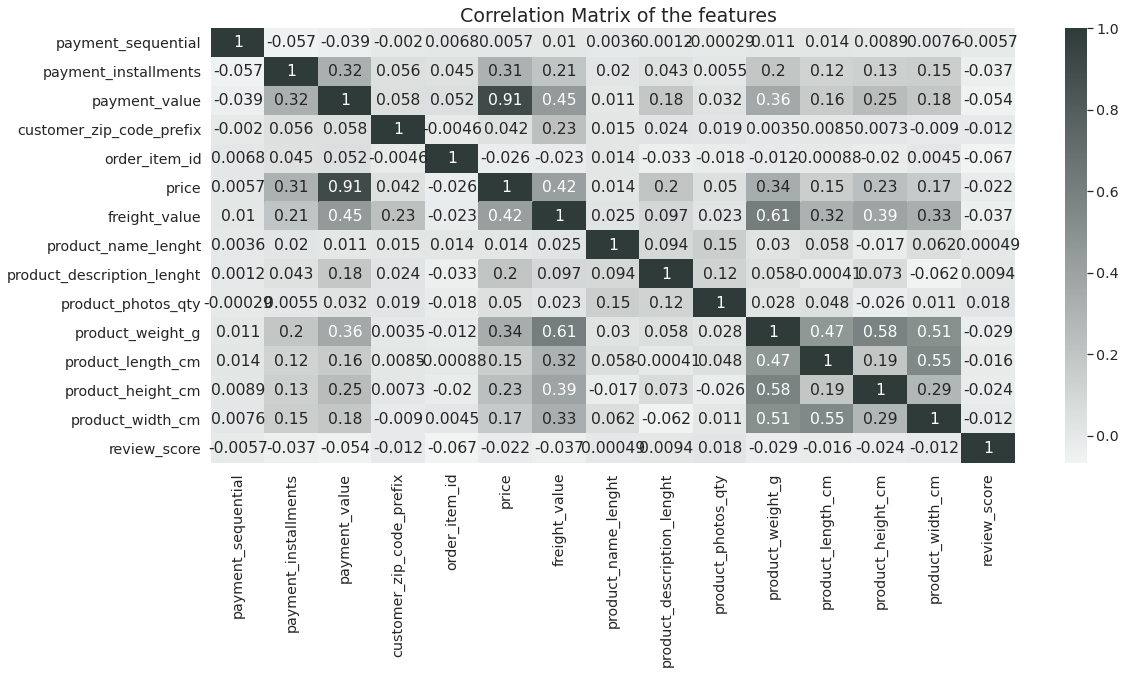

In [0]:
corr_matrix = df.corr()

plt.figure(figsize=(18,8))
sns.set(font_scale=1.3)
cmap = sns.light_palette("#2f3b39",as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap,annot=True)
plt.title("  Correlation Matrix of the features",fontsize=19)
plt.savefig('plot16.png', dpi=300, bbox_inches='tight')
plt.show()

In [0]:
#from above heatmap of correlation amongst columns , we can see that there is high correlation between price and payment value, frieght value and product_weight_g , product_length_cm and product_width_cm , product_height_cm and product_weight_g 

In [0]:
#Now our target variable is review_score, so I will check it's correlation with other columns.
corr_matrix['review_score'].sort_values(ascending = False)

Out[60]: review_score 1.000000
product_photos_qty 0.018332
product_description_lenght 0.009377
product_name_lenght 0.000495
payment_sequential -0.005685
customer_zip_code_prefix -0.011552
product_width_cm -0.011759
product_length_cm -0.015763
price -0.022488
product_height_cm -0.023692
product_weight_g -0.028834
freight_value -0.036928
payment_installments -0.037245
payment_value -0.054138
order_item_id -0.066646
Name: review_score, dtype: float64

In [0]:
#Now I will check unique no. of products, customers, sellers.
print("sellers : ", len((df.seller_id).unique()))
print("products : ", len((df.product_id).unique()))
print("customers : ", len((df.customer_unique_id).unique()))

sellers : 3022
products : 31053
customers : 94087

In [0]:
#Highest no. of unique id is from customers and least is from sellers

In [0]:
df.head()

Out[63]:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,"Só achei ela pequena pra seis xícaras ,mais é ..."
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13,1,boleto,1,44.09,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,nao_reveja
6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21,1,credit_card,10,356.12,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,1,be021417a6acb56b9b50d3fd2714baa8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-11-30 00:21:09,339.00,17.12,utilidades_domesticas,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares,0,"Inicialmente, na data da compra o produto era ..."


In [0]:
df.groupby('payment_type').size()

Out[64]: payment_type
boleto 19345
credit_card 73816
debit_card 1490
voucher 2604
dtype: int64

In [0]:
#Here we can see that one of the payment types is boleto.
#Boleto (English: Ticket) is a payment method in Brazil regulated by FEBRABAN, short for Brazilian Federation of Banks.It can be paid at ATMs, branch facilities and internet banking of any Bank, Post Office, Lottery Agent and some supermarkets until its due date.
#

In [0]:

#I will add some data to existing dataframe which will give better idea of exactly when the order was purchased for better accuracy.

# Extracting attributes for purchase date - Year and Month
df['order_purchase_year'] = df['order_purchase_timestamp'].apply(lambda x: x.year) #gives year Example :2016-10-04 09:43:32 ---->2016
df['order_purchase_month'] = df['order_purchase_timestamp'].apply(lambda x: x.month) #gives month Example :2016-10-04 09:43:32 ---->10
df['order_purchase_month_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))#gives month in short form Example :2016-10-04 09:43:32 ---->10--> Oct (stackoverflow)
df['order_purchase_year_month'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))#gives month&year Example :2016-10-04 09:43:32 ---->201610
df['order_purchase_date'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))#gives month,yr and date  Example :2016-10-04 09:43:32 ---->20161004
df['order_purchase_month_yr'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime("%b-%y"))

# Extracting attributes for purchase date - Day and Day of Week
df['order_purchase_day'] = df['order_purchase_timestamp'].apply(lambda x: x.day)
df['order_purchase_dayofweek'] = df['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df['order_purchase_dayofweek_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
df['order_purchase_hour'] = df['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df['order_purchase_time_day'] = pd.cut(df['order_purchase_hour'], hours_bins, labels=hours_labels)

df['day_to_delivery']=((df['order_delivered_customer_date']-df['order_purchase_timestamp']).dt.days)

df['words_per_review'] = df.review_comment_message.apply(lambda x: len(x.split(" ")))

#code source-https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

In [0]:
# New DataFrame after transformations
df.head()

Out[67]:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_month_yr,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,day_to_delivery,words_per_review
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,"Não testei o produto ainda, mas ele veio corre...",2017,10,Oct,201710,20171002,Oct-17,2,0,Mon,10,Morning,8,32
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,Deveriam embalar melhor o produto. A caixa vei...,2017,8,Aug,201708,20170815,Aug-17,15,1,Tue,18,Afternoon,2,16
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,"Só achei ela pequena pra seis xícaras ,mais é ...",2017,8,Aug,201708,20170802,Aug-17,2,2,Wed,18,Afternoon,5,12
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13,1,boleto,1,44.09,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,nao_reveja,2017,10,Oct,201710,20171023,Oct-17,23,0,Mon,23,Night,14,1
6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21,1,credit_card,10,356.12,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,1,be021417a6acb56b9b50d3fd2714baa8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-11-30 00:21:09,339.00,17.12,utilidades_domesticas,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares,0,"Inicialmente, na data da compra o produto era ...",2017,11,Nov,201711,20171124,Nov-17,24,4,Fri,21,Night,33,22


In [0]:

#RFM : - Customer Behavioral segmentation by 3 important features:

#Recency — number of days since the last purchase

#Frequency — number of transactions made over a given period

#Monetary — amount spent over a given period of time

#RFM analysis is a data driven customer behavior segmentation technique. RFM stands for recency, frequency, and monetary value. The idea is to segment customers based on when their last purchase was, how often they've purchased in the past, and how much they've spent overall.

In [0]:

df['order_purchase_timestamp'].max()

Out[69]: Timestamp('2018-09-03 09:06:57')

In [0]:
PRESENT = datetime(2018,9,3) #For present date, I choose max date frrom order_purchase _timestamp for data recency.
rfm= df.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda date: (PRESENT - date.max()).days,
                                        'order_id': lambda num: len(num),
                                        'payment_value': lambda price: price.sum()})
rfm.columns=['recency','frequency','monetary']
rfm['recency'] = rfm['recency'].astype(int)
rfm['frequency'] = rfm['frequency'].astype(int)
rfm['monetary'] = rfm['monetary'].astype(float)

In [0]:
rfm.head()

Out[71]:

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
0000f46a3911fa3c0805444483337064,541,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
0004aac84e0df4da2b147fca70cf8255,292,1,196.89


In [0]:
#distributing rfm based on quartile.
def partition(x):
    if x < 10:
      return 1
    if 10<=x<=35:
      return 2
    if 35<x<=50:
      return 3
    if 50<x<=75:
      return 4      

rfm['f_quartile']=rfm['frequency'].map(lambda cw : partition(cw) ) # using above function to distribute frequency in 4 quarters

# checking the review score for r , f , m.
rfm.f_quartile.value_counts()
r_labels = range(4, 0, -1);m_labels= range(1,5)

rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, r_labels) #qcut -- Quantile-based discretization function, in our case 4
 
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, m_labels)

In [0]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str) #r + f + m (as per quartile,  eg : if r =4 , f=1, m = 3 then rfm score is 413)
rfm.head()

Out[73]:

,recency,frequency,monetary,f_quartile,r_quartile,m_quartile,RFM_Score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,1,4,3,413
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,1,4,1,411
0000f46a3911fa3c0805444483337064,541,1,86.22,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,1,2,1,211
0004aac84e0df4da2b147fca70cf8255,292,1,196.89,1,2,4,214


In [0]:
rfm['RFM_Score_s'] = rfm[['r_quartile','f_quartile','m_quartile']].sum(axis=1)
print(rfm['RFM_Score_s'].head())
#total sum of r + f + m score

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2 8
0000b849f77a49e4a4ce2b2a4ca5be3f 6
0000f46a3911fa3c0805444483337064 4
0000f6ccb0745a6a4b88665a16c9f078 4
0004aac84e0df4da2b147fca70cf8255 7
Name: RFM_Score_s, dtype: int64

In [0]:
#now since I have got final rfm score , I will sort customers based on the score.

In [0]:
def rfm_level(df):
    if df['RFM_Score_s'] >= 9:
        return 'Cannot Loose Them'
    elif ((df['RFM_Score_s'] >= 8) and (df['RFM_Score_s'] < 9)):
        return 'Extremely loyal'
    elif ((df['RFM_Score_s'] >= 7) and (df['RFM_Score_s'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score_s'] >= 6) and (df['RFM_Score_s'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score_s'] >= 5) and (df['RFM_Score_s'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score_s'] >= 4) and (df['RFM_Score_s'] < 5)):
        return 'Needs Attention'
    else:
        return 'Need to be active / Inactive'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

Out[76]:

,recency,frequency,monetary,f_quartile,r_quartile,m_quartile,RFM_Score,RFM_Score_s,RFM_Level
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,1,4,3,413,8,Extremely loyal
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,1,4,1,411,6,Potential
0000f46a3911fa3c0805444483337064,541,1,86.22,1,1,2,112,4,Needs Attention
0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,1,2,1,211,4,Needs Attention
0004aac84e0df4da2b147fca70cf8255,292,1,196.89,1,2,4,214,7,Loyal


In [0]:
#Now we will see no. of customers and their r, f, m in each of the above defined categories

In [0]:
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()

recency frequency monetary 
 mean mean mean count
RFM_Level 
Cannot Loose Them 62.4 1.1 401.9 6036
Extremely loyal 114.9 1.1 257.3 12064
Loyal 171.2 1.0 202.6 17478
Need to be active / Inactive 459.6 1.0 41.3 6072
Needs Attention 368.1 1.0 62.2 11827
Potential 241.9 1.0 165.1 23083
Promising 300.6 1.0 86.4 17527

In [0]:
#Now from above data, we can see that most of the customer's of our client are in the category of potential.
#also , olist needs handle client from needs attention and inactive category in order to retain them.
#In order to gather insights on customers, rfm analysis and rfm_s score needs to be monitored.

In [0]:
stopwords_portuguese = stopwords.words('portuguese')
print(f'Total portuguese stopwords in the nltk.corpous module: {len(stopwords_portuguese)}')
print('Some Stopwords:',stopwords_portuguese[0:20])

Total portuguese stopwords in the nltk.corpous module: 204
Some Stopwords: ['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais']

In [0]:
#removing 'nao' & 'nem' which means no
stopwords_portuguese.remove('não')
stopwords_portuguese.remove('nem')

In [0]:
df['review_comment_message'].head()

Out[82]: 0 Não testei o produto ainda, mas ele veio corre...
3 Deveriam embalar melhor o produto. A caixa vei...
4 Só achei ela pequena pra seis xícaras ,mais é ...
5 nao_reveja
6 Inicialmente, na data da compra o produto era ...
Name: review_comment_message, dtype: object

In [0]:
#https://www.kaggle.com/thiagopanini/e-commerce-sentiment-analysis-eda-viz-nlp
#text processing is done portuguese 
# at line 22, Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

def preprocess_text(texts):
    hyperlinks = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+' # check for hyperlinks
    dates = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}' # check for dates
    currency_symbols = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+' # check for currency symbols
    preprocessed_text = []
    stemmer = RSLPStemmer() # portugese nltk stemmer
    for sent in tqdm(texts):
        sent = re.sub(r"[\n\t\-\\\/]"," ",sent)#removing the new line,tab  
        sent = re.sub(hyperlinks, ' url ', sent) # replacing hyperlinks with 'url'
        sent = re.sub(dates, ' ', sent) # removing dates
        sent = re.sub(currency_symbols, ' dinheiro ', sent) # replacing currency symbols with 'dinheiro'
        sent = re.sub('[0-9]+', ' numero ', sent) # removing digits
        sent = re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )', ' negação ', sent) # replacing no with negative
        sent = re.sub('\W', ' ', sent) # removing extra whitespaces
        sent = re.sub('\s+', ' ', sent) # removing extra spaces
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords_portuguese) # removing stopwords
        sent = ' '.join(stemmer.stem(e.lower()) for e in sent.split()) # stemming the words
        preprocessed_text.append(sent.lower().strip())
        
    return preprocessed_text

In [0]:
processed_text = preprocess_text(df['review_comment_message'].values)

0%| | 0/97255 [00:00<?, ?it/s] 0%| | 104/97255 [00:00<01:33, 1037.52it/s] 0%| | 323/97255 [00:00<01:18, 1231.25it/s] 1%| | 737/97255 [00:00<01:01, 1559.78it/s] 1%| | 1138/97255 [00:00<00:50, 1909.50it/s] 2%|▏ | 1551/97255 [00:00<00:42, 2276.35it/s] 2%|▏ | 1991/97255 [00:00<00:35, 2658.84it/s] 3%|▎ | 2462/97255 [00:00<00:31, 3055.29it/s] 3%|▎ | 2901/97255 [00:00<00:28, 3361.45it/s] 3%|▎ | 3298/97255 [00:00<00:26, 3490.04it/s] 4%|▍ | 3760/97255 [00:01<00:24, 3762.85it/s] 4%|▍ | 4173/97255 [00:01<00:24, 3859.82it/s] 5%|▍ | 4586/97255 [00:01<00:23, 3904.75it/s] 5%|▌ | 5037/97255 [00:01<00:22, 4067.44it/s] 6%|▌ | 5459/97255 [00:01<00:22, 4046.67it/s] 6%|▌ | 5884/97255 [00:01<00:22, 4104.90it/s] 6%|▋ | 6302/97255 [00:01<00:27, 3332.37it/s] 7%|▋ | 6665/97255 [00:01<00:31, 2871.09it/s] 7%|▋ | 6984/97255 [00:01<00:33, 2692.04it/s] 7%|▋ | 7278/97255 [00:02<00:33, 2693.11it/s] 8%|▊ | 7565/97255 [00:02<00:34, 2604.50it/s] 8%|▊ | 7838/97255 [00:02<00:34, 2575.37it/s] 8%|▊ | 8123/97255 [00:02<00:33, 2645.87it/s] 9%|▊ | 8416/97255 [00:02<00:32, 2725.06it/s] 9%|▉ | 8881/97255 [00:02<00:28, 3111.43it/s] 10%|▉ | 9325/97255 [00:02<00:25, 3416.59it/s] 10%|▉ | 9716/97255 [00:02<00:24, 3544.99it/s] 10%|█ | 10090/97255 [00:02<00:25, 3464.62it/s] 11%|█ | 10450/97255 [00:03<00:26, 3237.22it/s] 11%|█ | 10915/97255 [00:03<00:24, 3561.28it/s] 12%|█▏ | 11324/97255 [00:03<00:23, 3692.78it/s] 12%|█▏ | 11811/97255 [00:03<00:21, 3979.99it/s] 13%|█▎ | 12226/97255 [00:03<00:21, 3992.77it/s] 13%|█▎ | 12637/97255 [00:03<00:21, 4001.19it/s] 13%|█▎ | 13104/97255 [00:03<00:20, 4179.54it/s] 14%|█▍ | 13581/97255 [00:03<00:19, 4339.00it/s] 14%|█▍ | 14022/97255 [00:03<00:20, 4055.57it/s] 15%|█▍ | 14492/97255 [00:04<00:19, 4226.18it/s] 15%|█▌ | 14923/97255 [00:04<00:19, 4198.11it/s] 16%|█▌ | 15389/97255 [00:04<00:18, 4326.75it/s] 16%|█▋ | 15835/97255 [00:04<00:18, 4359.71it/s] 17%|█▋ | 16276/97255 [00:04<00:18, 4371.84it/s] 17%|█▋ | 16716/97255 [00:04<00:18, 4357.36it/s] 18%|█▊ | 17154/97255 [00:04<00:18, 4340.85it/s] 18%|█▊ | 17600/97255 [00:04<00:18, 4368.96it/s] 19%|█▊ | 18038/97255 [00:04<00:18, 4355.93it/s] 19%|█▉ | 18475/97255 [00:04<00:18, 4172.27it/s] 19%|█▉ | 18918/97255 [00:05<00:18, 4245.51it/s] 20%|█▉ | 19345/97255 [00:05<00:18, 4225.89it/s] 20%|██ | 19769/97255 [00:05<00:18, 4208.57it/s] 21%|██ | 20191/97255 [00:05<00:18, 4170.81it/s] 21%|██ | 20635/97255 [00:05<00:18, 4242.01it/s] 22%|██▏ | 21060/97255 [00:05<00:18, 4118.75it/s] 22%|██▏ | 21474/97255 [00:05<00:18, 4060.00it/s] 23%|██▎ | 21900/97255 [00:05<00:18, 4116.66it/s] 23%|██▎ | 22313/97255 [00:05<00:18, 4000.63it/s] 23%|██▎ | 22715/97255 [00:05<00:19, 3833.96it/s] 24%|██▍ | 23184/97255 [00:06<00:18, 4055.28it/s] 24%|██▍ | 23597/97255 [00:06<00:18, 4077.37it/s] 25%|██▍ | 24009/97255 [00:06<00:19, 3784.20it/s] 25%|██▌ | 24395/97255 [00:06<00:19, 3741.93it/s] 25%|██▌ | 24775/97255 [00:06<00:20, 3539.01it/s] 26%|██▌ | 25211/97255 [00:06<00:19, 3750.40it/s] 26%|██▋ | 25594/97255 [00:06<00:19, 3722.96it/s] 27%|██▋ | 25986/97255 [00:06<00:18, 3779.38it/s] 27%|██▋ | 26453/97255 [00:06<00:17, 4007.14it/s] 28%|██▊ | 26861/97255 [00:07<00:17, 4005.27it/s] 28%|██▊ | 27267/97255 [00:07<00:17, 3917.75it/s] 28%|██▊ | 27663/97255 [00:07<00:17, 3912.52it/s] 29%|██▉ | 28057/97255 [00:07<00:17, 3861.74it/s] 29%|██▉ | 28505/97255 [00:07<00:17, 4027.45it/s] 30%|██▉ | 28929/97255 [00:07<00:16, 4088.20it/s] 30%|███ | 29341/97255 [00:07<00:17, 3807.49it/s] 31%|███ | 29807/97255 [00:07<00:16, 4028.31it/s] 31%|███ | 30236/97255 [00:07<00:16, 4102.48it/s] 32%|███▏ | 30663/97255 [00:07<00:16, 4147.41it/s] 32%|███▏ | 31082/97255 [00:08<00:16, 4083.36it/s] 32%|███▏ | 31513/97255 [00:08<00:15, 4142.48it/s] 33%|███▎ | 31930/97255 [00:08<00:15, 4103.79it/s] 33%|███▎ | 32357/97255 [00:08<00:15, 4151.48it/s] 34%|███▎ | 32774/97255 [00:08<00:15, 4072.35it/s] 34%|███▍ | 33183/97255 [00:08<00:15, 4059.60it/s] 35%|███▍ | 33625/97255 [00:08<00:15, 4152.68it/s

In [0]:
df['review_comment_message'].head()

Out[85]: 0 Não testei o produto ainda, mas ele veio corre...
3 Deveriam embalar melhor o produto. A caixa vei...
4 Só achei ela pequena pra seis xícaras ,mais é ...
5 nao_reveja
6 Inicialmente, na data da compra o produto era ...
Name: review_comment_message, dtype: object

In [0]:
df['review_comment_message'] = processed_text
df['review_comment_message'].head()

Out[86]: 0 neg test produt aind vei corret boa cond apen ...
3 dev embal melhor produt caix vei tod amass vou...
4 ach pequen pra seil xíc bom produt
5 neg _revej
6 inic dat compr produt ser entreg numer numer h...
Name: review_comment_message, dtype: object

In [0]:
#sellers count for each product
fea_1= df.groupby('product_id').count()['seller_id']
fea_1_df = pd.DataFrame()
fea_1_df['product_id']= fea_1.index
fea_1_df['sellers_count']= fea_1.values
fea_1_df.head()

Out[87]:

,product_id,sellers_count
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,2
4,000d9be29b5207b54e86aa1b1ac54872,1


In [0]:
#products count for each order
fea_2 = df.groupby('order_id').count()['product_id']
fea_2_df = pd.DataFrame()
fea_2_df['order_id']= fea_2.index
fea_2_df['products_count']= fea_2.values
fea_2_df.head()


Out[88]:

,order_id,products_count
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [0]:

data = pd.merge(df,fea_1_df,on='product_id')

In [0]:
data.head(2)

Out[90]:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_month_yr,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,day_to_delivery,words_per_review,sellers_count
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,neg test produt aind vei corret boa cond apen ...,2017,10,Oct,201710,20171002,Oct-17,2,0,Mon,10,Morning,8,32,4
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,dev embal melhor produt caix vei tod amass vou...,2017,8,Aug,201708,20170815,Aug-17,15,1,Tue,18,Afternoon,2,16,4


In [0]:
# Adding the seller count and products count feature to the final data set
#data = pd.merge(df,fea_2_df,on='order_id')
data = data.join(fea_2_df['products_count'])

In [0]:
data.head(2)

Out[92]:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_month_yr,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,day_to_delivery,words_per_review,sellers_count,products_count
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,neg test produt aind vei corret boa cond apen ...,2017,10,Oct,201710,20171002,Oct-17,2,0,Mon,10,Morning,8,32,4,1
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,dev embal melhor produt caix vei tod amass vou...,2017,8,Aug,201708,20170815,Aug-17,15,1,Tue,18,Afternoon,2,16,4,1


In [0]:
# https://www.kaggle.com/andresionek/predicting-customer-satisfaction

# calculating estimated delivery time
data['est_delivery_t'] = (data['order_estimated_delivery_date'] - data['order_approved_at']).dt.days

# calculating actual delivery time
data['act_delivery_t'] = (data['order_delivered_customer_date'] - data['order_approved_at']).dt.days

# calculating diff_in_delivery_time
data['diff_in_delivery_t'] = data['est_delivery_t'] - data['act_delivery_t']

# finding if delivery was late
data['on_time_delivery'] = data['order_delivered_customer_date'] < data['order_estimated_delivery_date']
data['on_time_delivery'] = data['on_time_delivery'].astype('int')

# calculating mean product value
data['avg_prdt_value'] = data['price']/data['products_count']

# finding total order cost
data['total_order_cost'] = data['price'] + data['freight_value']

# calculating order freight ratio
data['order_freight_ratio'] = data['freight_value']/data['price']

# finding the day of week on which order was made
data['purchase_dayofweek'] = pd.to_datetime(data['order_purchase_timestamp']).dt.dayofweek

# adding is_reviewed where 1 is if review comment is given otherwise 0.
data['is_reviewed'] = (data['review_comment_message'] != 'no_review').astype('int')

In [0]:
data = data.merge(rfm ,on ='customer_unique_id',how='left')

In [0]:
#More info on added features

#Sellers Count: Total number of sellers per product (Numerical feat.).

#Products count: Total number of products ordered per order (Numerical feat.).

#Estimated Delivery Time(in number of days): Estimated number of days tto deliver the producti.e (order_approval_date - order_estimated_delivery_date)(Numerical feat.).

#Actual Delivery Time: Actual number of days taken to deliver the product(Numerical feat.).

#Difference in delivery days:- Difference between the actual and estimated date(Numerical feat.). Negative : delivered early ,positive : delivered late.

#Is Late:- If delivered late then True else False (Binary).

#Average Product Value:- Cheaper products might have lower quality, leaving customers unhappy (Numerical feat.).

#Total Order Value:- If a customer expends more, he might expect a better order fulfilment(Numerical feat.).

#Order Freight Ratio:- If a customer pays more for freight, he might expect a better service(Numerical feat.).

#Purchase Day of Week:- Day of week on which purchase was made(Numerical feat.).

#is_reviewed:- If the review comment is given or not.

#other:

  # Recency : number of days since the last purchase(present date -last ordered date)(Numerical feat.).
  # Frequency : number of transactions made over the period(present date -last ordered date)(Numerical feat.).
  # Monetary : amount spent over a given period time (Numerical feat.)
  # RFM Levels :Behavioral segmentations using above three features (Categorical).
  # words per review : Total number of words per review (Numerical feat.).


In [0]:
data.isnull().sum().sum()

Out[96]: 0

In [0]:
#Since I'm focusing on reviews and customer satisfaction , I'll drop irrelevant columns like customer_id , product_id etc, which have no effect on my prediction and keep only those columns which are relevant for prediction

In [0]:
col= ['order_id',
 'customer_id',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
  'customer_unique_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
  'order_purchase_year',
 'order_purchase_month',
 'order_purchase_month_name',
 'order_purchase_year_month',
 'order_purchase_date',
 'order_purchase_month_yr',
 'order_purchase_day',
 'order_purchase_dayofweek',
 'order_purchase_dayofweek_name',
 'order_purchase_hour',
 'order_purchase_time_day',
  'f_quartile',
 'r_quartile',
 'm_quartile',
 'RFM_Score','RFM_Score_s','product_category_name']

In [0]:
data.drop(columns = col, axis = 1 , inplace = True)

In [0]:
data.head()

Out[100]:

,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message,day_to_delivery,words_per_review,sellers_count,products_count,est_delivery_t,act_delivery_t,diff_in_delivery_t,on_time_delivery,avg_prdt_value,total_order_cost,order_freight_ratio,purchase_dayofweek,is_reviewed,recency,frequency,monetary,RFM_Level
0,delivered,1,credit_card,1,18.12,3149,sao paulo,SP,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,neg test produt aind vei corret boa cond apen ...,8,32,4,1,15,8,7,1,29.99,38.71,0.290764,0,1,335,2,62.23,Promising
1,delivered,1,credit_card,3,37.77,3366,sao paulo,SP,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,dev embal melhor produt caix vei tod amass vou...,2,16,4,1,12,2,10,1,29.99,37.77,0.259420,1,1,383,1,37.77,Need to be active / Inactive
2,delivered,1,credit_card,1,37.77,2290,sao paulo,SP,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,ach pequen pra seil xíc bom produt,5,12,4,1,12,4,8,1,29.99,37.77,0.259420,2,1,396,1,37.77,Need to be active / Inactive
3,delivered,1,boleto,1,44.09,88032,florianopolis,SC,29.99,14.10,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,neg _revej,14,1,4,1,18,13,5,1,29.99,44.09,0.470157,0,1,314,1,44.09,Needs Attention
4,delivered,1,credit_card,10,356.12,19400,presidente venceslau,SP,339.00,17.12,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares,0,inic dat compr produt ser entreg numer numer h...,33,22,1,1,25,33,-8,0,339.00,356.12,0.050501,4,1,282,1,356.12,Loyal


In [0]:
processed_text = preprocess_text(data['review_comment_message'].values)

0%| | 0/97255 [00:00<?, ?it/s] 0%| | 218/97255 [00:00<00:44, 2176.45it/s] 1%| | 644/97255 [00:00<00:37, 2550.30it/s] 1%| | 979/97255 [00:00<00:35, 2746.58it/s] 1%|▏ | 1422/97255 [00:00<00:30, 3099.72it/s] 2%|▏ | 1854/97255 [00:00<00:28, 3385.79it/s] 2%|▏ | 2348/97255 [00:00<00:25, 3738.53it/s] 3%|▎ | 2779/97255 [00:00<00:24, 3889.82it/s] 3%|▎ | 3233/97255 [00:00<00:23, 4064.26it/s] 4%|▎ | 3646/97255 [00:00<00:23, 4001.26it/s] 4%|▍ | 4071/97255 [00:01<00:22, 4072.16it/s] 5%|▍ | 4482/97255 [00:01<00:23, 3987.58it/s] 5%|▌ | 4884/97255 [00:01<00:23, 3987.23it/s] 5%|▌ | 5285/97255 [00:01<00:23, 3981.82it/s] 6%|▌ | 5717/97255 [00:01<00:22, 4073.81it/s] 6%|▋ | 6132/97255 [00:01<00:22, 4096.36it/s] 7%|▋ | 6543/97255 [00:01<00:22, 4090.89it/s] 7%|▋ | 6977/97255 [00:01<00:21, 4161.48it/s] 8%|▊ | 7441/97255 [00:01<00:20, 4291.21it/s] 8%|▊ | 7872/97255 [00:01<00:20, 4286.02it/s] 9%|▊ | 8302/97255 [00:02<00:20, 4264.95it/s] 9%|▉ | 8730/97255 [00:02<00:20, 4232.28it/s] 9%|▉ | 9174/97255 [00:02<00:20, 4292.12it/s] 10%|▉ | 9604/97255 [00:02<00:20, 4221.99it/s] 10%|█ | 10027/97255 [00:02<00:20, 4188.61it/s] 11%|█ | 10447/97255 [00:02<00:21, 4069.10it/s] 11%|█ | 10880/97255 [00:02<00:20, 4143.40it/s] 12%|█▏ | 11296/97255 [00:02<00:20, 4135.44it/s] 12%|█▏ | 11727/97255 [00:02<00:20, 4185.76it/s] 12%|█▏ | 12147/97255 [00:02<00:20, 4189.76it/s] 13%|█▎ | 12567/97255 [00:03<00:20, 4134.55it/s] 13%|█▎ | 12981/97255 [00:03<00:20, 4085.90it/s] 14%|█▍ | 13412/97255 [00:03<00:20, 4150.11it/s] 14%|█▍ | 13828/97255 [00:03<00:20, 4068.84it/s] 15%|█▍ | 14255/97255 [00:03<00:20, 4123.86it/s] 15%|█▌ | 14670/97255 [00:03<00:19, 4131.04it/s] 16%|█▌ | 15088/97255 [00:03<00:19, 4138.73it/s] 16%|█▌ | 15544/97255 [00:03<00:19, 4248.39it/s] 16%|█▋ | 16003/97255 [00:03<00:18, 4345.30it/s] 17%|█▋ | 16439/97255 [00:03<00:18, 4341.20it/s] 17%|█▋ | 16874/97255 [00:04<00:19, 4220.65it/s] 18%|█▊ | 17302/97255 [00:04<00:18, 4236.84it/s] 18%|█▊ | 17740/97255 [00:04<00:18, 4277.47it/s] 19%|█▊ | 18169/97255 [00:04<00:21, 3615.09it/s] 19%|█▉ | 18549/97255 [00:04<00:23, 3363.87it/s] 19%|█▉ | 18926/97255 [00:04<00:22, 3473.67it/s] 20%|█▉ | 19333/97255 [00:04<00:21, 3632.71it/s] 20%|██ | 19762/97255 [00:04<00:20, 3805.95it/s] 21%|██ | 20153/97255 [00:04<00:20, 3714.84it/s] 21%|██ | 20537/97255 [00:05<00:20, 3751.34it/s] 22%|██▏ | 20954/97255 [00:05<00:19, 3859.37it/s] 22%|██▏ | 21345/97255 [00:05<00:20, 3781.91it/s] 22%|██▏ | 21764/97255 [00:05<00:19, 3895.01it/s] 23%|██▎ | 22184/97255 [00:05<00:18, 3975.54it/s] 23%|██▎ | 22585/97255 [00:05<00:19, 3840.52it/s] 24%|██▎ | 23002/97255 [00:05<00:18, 3933.13it/s] 24%|██▍ | 23405/97255 [00:05<00:18, 3960.95it/s] 24%|██▍ | 23803/97255 [00:05<00:19, 3783.66it/s] 25%|██▍ | 24185/97255 [00:06<00:19, 3738.24it/s] 25%|██▌ | 24562/97255 [00:06<00:21, 3337.00it/s] 26%|██▌ | 24963/97255 [00:06<00:20, 3513.85it/s] 26%|██▌ | 25350/97255 [00:06<00:19, 3611.29it/s] 26%|██▋ | 25736/97255 [00:06<00:19, 3676.41it/s] 27%|██▋ | 26109/97255 [00:06<00:19, 3606.04it/s] 27%|██▋ | 26474/97255 [00:06<00:19, 3561.02it/s] 28%|██▊ | 26834/97255 [00:06<00:21, 3318.22it/s] 28%|██▊ | 27227/97255 [00:06<00:20, 3476.42it/s] 28%|██▊ | 27581/97255 [00:07<00:21, 3306.72it/s] 29%|██▉ | 27970/97255 [00:07<00:20, 3461.78it/s] 29%|██▉ | 28337/97255 [00:07<00:19, 3521.11it/s] 30%|██▉ | 28797/97255 [00:07<00:18, 3786.38it/s] 30%|███ | 29185/97255 [00:07<00:18, 3701.21it/s] 30%|███ | 29562/97255 [00:07<00:18, 3613.27it/s] 31%|███ | 30006/97255 [00:07<00:17, 3825.60it/s] 31%|███▏ | 30434/97255 [00:07<00:16, 3949.79it/s] 32%|███▏ | 30908/97255 [00:07<00:15, 4156.64it/s] 32%|███▏ | 31369/97255 [00:07<00:15, 4281.40it/s] 33%|███▎ | 31803/97255 [00:08<00:17, 3766.90it/s] 33%|███▎ | 32198/97255 [00:08<00:17, 3811.92it/s] 34%|███▎ | 32591/97255 [00:08<00:17, 3685.79it/s] 34%|███▍ | 32984/97255 [00:08<00:17, 3749.79it/s] 34%|███▍ | 33368/97255 [00:08<00:16, 3772.84it/s] 35%|███▍ | 33750/97255 [00:08<00:17,

In [0]:
data['review_comment_message'] = processed_text
data['review_comment_message'].head()

Out[102]: 0 neg test produt aind vei corret boa cond apen ...
1 dev embal melhor produt caix vei tod amas vou ...
2 ach pequen pra seil xíc bom produt
3 neg _revej
4 inic dat compr produt ser entreg num num hoj d...
Name: review_comment_message, dtype: object

In [0]:
#Earlier , I mentioned that our target variable review_score is imbalanced (there are more 1(85%) than 0(15%)).
#Stratified sampling selects same ratio of 1:0 in training and testing data.
#otherwise there might be more 1's in training and 0's in testing.

In [0]:
y = data['review_score'].values
X = data.drop(['review_score'], axis = 1)
print(X.shape,y.shape)
X.head(2)

(97255, 36) (97255,)
Out[104]:

,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_comment_message,day_to_delivery,words_per_review,sellers_count,products_count,est_delivery_t,act_delivery_t,diff_in_delivery_t,on_time_delivery,avg_prdt_value,total_order_cost,order_freight_ratio,purchase_dayofweek,is_reviewed,recency,frequency,monetary,RFM_Level
0,delivered,1,credit_card,1,18.12,3149,sao paulo,SP,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,neg test produt aind vei corret boa cond apen ...,8,32,4,1,15,8,7,1,29.99,38.71,0.290764,0,1,335,2,62.23,Promising
1,delivered,1,credit_card,3,37.77,3366,sao paulo,SP,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,dev embal melhor produt caix vei tod amas vou ...,2,16,4,1,12,2,10,1,29.99,37.77,0.259420,1,1,383,1,37.77,Need to be active / Inactive


In [0]:
#y_unknown = y[77804:]
#y_known = y[:77804]
#print(y_unknown.shape, y_known.shape)
#X_unknown = X[77804:]
#X_known = X[:77804]
#print(X_unknown.shape, X_known.shape)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=25)

print('X_train shape , X_test shape :  ', X_train.shape, X_test.shape)
print('ytrain shape , y_test shape :  ', y_train.shape, y_test.shape)

X_train shape , X_test shape : (77804, 36) (19451, 36)
ytrain shape , y_test shape : (77804,) (19451,)

In [0]:
#Pre trained model with portuguese words which will be use to convert words into vectors.
#From the review text , most important words will be found using tf-idf.
#https://medium.com/@paritosh_30025/natural-language-processing-text-data-vectorization-af2520529cf7

In [0]:
#ft_model = FastText.load_fasttext_format('/databricks/driver/cc.pt.300.bin')
#ft_model = FastText.load_fasttext_format(datapath('/databricks/driver/cc.pt.300.bin'))
#from gensim.models import FastText'
#ft_model = FastText.load_fasttext_format('/databricks/driver/cc.pt.300.bin')

In [0]:
ft_model.wv['melhor'].shape

Out[109]: (300,)

In [0]:
#Words in our model with root word product
ft_model.wv.similar_by_vector('produt')

Out[110]: [('produts', 0.6906508803367615),
 ('produ', 0.6056191921234131),
 ('produtoa', 0.5977535247802734),
 ('produe', 0.57929527759552),
 ('produto', 0.5772073864936829),
 ('produtos', 0.5754655003547668),
 ('produtoo', 0.5647249817848206),
 ('produç', 0.561500608921051),
 ('protudo', 0.5558850765228271),
 ('produtoe', 0.5553520321846008)]

In [0]:
def tfidfWord2Vector(text,ft_words,tfidf_words,tf_values):
    # average Word2Vec
    # compute average word2vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(text): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in ft_words) and (word in tfidf_words):
                vec = ft_model.wv[word] # embeddings[word] 
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = tf_values[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    tfidf_w2v_vectors = np.asarray(tfidf_w2v_vectors)
    
    return tfidf_w2v_vectors

In [0]:
# encoding review comment message using Tfidf weighted W2V
tfidf = TfidfVectorizer()
tfidf.fit(X_train['review_comment_message'])
#tfidf = term frequency , inverse document frequency
#glove = global vectors , unsupervised machine learning algorithm

# we are converting a dictionary with word as a key, and the idf as a value
tf_values = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_words = set(tfidf.get_feature_names())
glove_words = list(ft_model.wv.index_to_key) # list(embeddings.keys())

tfidf_w2v_vectors_train = tfidfWord2Vector(X_train['review_comment_message'].values,glove_words,tfidf_words,tf_values)
tfidf_w2v_vectors_test = tfidfWord2Vector(X_test['review_comment_message'].values,glove_words,tfidf_words,tf_values)

0%| | 0/77804 [00:00<?, ?it/s] 0%| | 3/77804 [00:00<52:05, 24.89it/s] 0%| | 7/77804 [00:00<49:37, 26.12it/s] 0%| | 10/77804 [00:00<48:27, 26.75it/s] 0%| | 12/77804 [00:00<1:13:20, 17.68it/s] 0%| | 15/77804 [00:00<1:17:45, 16.67it/s] 0%| | 18/77804 [00:00<1:10:22, 18.42it/s] 0%| | 21/77804 [00:01<1:17:19, 16.76it/s] 0%| | 24/77804 [00:01<1:09:32, 18.64it/s] 0%| | 28/77804 [00:01<59:33, 21.76it/s]  0%| | 31/77804 [00:01<54:47, 23.66it/s] 0%| | 34/77804 [00:01<57:54, 22.38it/s] 0%| | 39/77804 [00:01<50:56, 25.44it/s] 0%| | 43/77804 [00:01<48:11, 26.89it/s] 0%| | 46/77804 [00:01<49:34, 26.14it/s] 0%| | 50/77804 [00:02<45:13, 28.66it/s] 0%| | 54/77804 [00:02<47:01, 27.55it/s] 0%| | 58/77804 [00:02<43:55, 29.50it/s] 0%| | 62/77804 [00:02<44:10, 29.34it/s] 0%| | 66/77804 [00:02<49:34, 26.14it/s] 0%| | 69/77804 [00:02<50:31, 25.64it/s] 0%| | 73/77804 [00:02<47:43, 27.15it/s] 0%| | 76/77804 [00:03<1:04:24, 20.11it/s] 0%| | 79/77804 [00:03<1:14:54, 17.29it/s] 0%| | 83/77804 [00:03<1:02:42, 20.66it/s] 0%| | 86/77804 [00:03<1:00:17, 21.49it/s] 0%| | 90/77804 [00:03<58:10, 22.27it/s]  0%| | 93/77804 [00:03<56:22, 22.97it/s] 0%| | 96/77804 [00:04<1:04:15, 20.15it/s] 0%| | 100/77804 [00:04<57:36, 22.48it/s]  0%| | 104/77804 [00:04<54:30, 23.76it/s] 0%| | 109/77804 [00:04<48:06, 26.91it/s] 0%| | 112/77804 [00:04<49:49, 25.99it/s] 0%| | 115/77804 [00:04<49:46, 26.01it/s] 0%| | 118/77804 [00:04<50:56, 25.41it/s] 0%| | 121/77804 [00:05<57:00, 22.71it/s] 0%| | 125/77804 [00:05<54:48, 23.62it/s] 0%| | 128/77804 [00:05<1:15:20, 17.18it/s] 0%| | 132/77804 [00:05<1:05:13, 19.85it/s] 0%| | 135/77804 [00:05<1:04:01, 20.22it/s] 0%| | 138/77804 [00:05<1:00:53, 21.26it/s] 0%| | 141/77804 [00:05<55:56, 23.14it/s]  0%| | 144/77804 [00:06<54:58, 23.54it/s] 0%| | 147/77804 [00:06<55:41, 23.24it/s] 0%| | 150/77804 [00:06<57:48, 22.39it/s] 0%| | 153/77804 [00:06<53:43, 24.09it/s] 0%| | 156/77804 [00:06<1:02:56, 20.56it/s] 0%| | 159/77804 [00:06<1:23:12, 15.55it/s] 0%| | 163/77804 [00:07<1:10:25, 18.37it/s] 0%| | 168/77804 [00:07<1:08:58, 18.76it/s] 0%| | 172/77804 [00:07<1:01:17, 21.11it/s] 0%| | 176/77804 [00:07<55:43, 23.22it/s]  0%| | 179/77804 [00:07<59:32, 21.73it/s] 0%| | 182/77804 [00:07<57:34, 22.47it/s] 0%| | 185/77804 [00:08<55:59, 23.10it/s] 0%| | 188/77804 [00:08<53:53, 24.01it/s] 0%| | 193/77804 [00:08<46:34, 27.78it/s] 0%| | 197/77804 [00:08<48:34, 26.63it/s] 0%| | 202/77804 [00:08<44:39, 28.96it/s] 0%| | 207/77804 [00:08<42:13, 30.62it/s] 0%| | 211/77804 [00:08<48:40, 26.57it/s] 0%| | 214/77804 [00:09<52:22, 24.69it/s] 0%| | 217/77804 [00:09<1:00:06, 21.51it/s] 0%| | 220/77804 [00:09<56:37, 22.84it/s]  0%| | 223/77804 [00:09<55:28, 23.31it/s] 0%| | 226/77804 [00:09<54:24, 23.76it/s] 0%| | 229/77804 [00:09<52:35, 24.59it/s] 0%| | 233/77804 [00:09<48:46, 26.51it/s] 0%| | 237/77804 [00:09<45:23, 28.48it/s] 0%| | 240/77804 [00:10<45:30, 28.40it/s] 0%| | 243/77804 [00:10<55:59, 23.08it/s] 0%| | 246/77804 [00:10<54:02, 23.92it/s] 0%| | 249/77804 [00:10<53:34, 24.12it/s] 0%| | 252/77804 [00:10<53:30, 24.16it/s] 0%| | 255/77804 [00:10<52:42, 24.52it/s] 0%| | 258/77804 [00:10<53:10, 24.31it/s] 0%| | 261/77804 [00:11<1:18:15, 16.51it/s] 0%| | 265/77804 [00:11<1:06:10, 19.53it/s] 0%| | 268/77804 [00:11<1:07:17, 19.20it/s] 0%| | 273/77804 [00:11<57:21, 22.53it/s]  0%| | 276/77804 [00:11<57:28, 22.48it/s] 0%| | 280/77804 [00:11<1:09:16, 18.65it/s] 0%| | 283/77804 [00:12<1:11:46, 18.00it/s] 0%| | 286/77804 [00:12<1:12:30, 17.82it/s] 0%| | 289/77804 [00:12<1:16:56, 16.79it/s] 0%| | 292/77804 [00:12<1:08:18, 18.91it/s] 0%| | 295/77804 [00:12<1:02:23, 20.70it/s] 0%| | 298/77804 [00:12<1:09:27, 18.60it/s] 0%| | 301/77804 [00:13<1:02:03, 20.81it/s] 0%| | 304/77804 [00:13<1:13:45, 17.51it/s] 0%| | 307/77804 [00:13<1:13:26, 17.59it/s] 0%| | 311/77804 [00:13<1:04:07, 20.14it/s] 0%| | 314/77804 [00:13<1:00:59, 21.18it/s] 0%| | 317/77804 [00:13<1:02:49, 20.56it/s] 0%| | 322/778

In [0]:
tfidf_w2v_vectors_train.shape,tfidf_w2v_vectors_test.shape

Out[113]: ((77804, 300), (19451, 300))

In [0]:
pickle.dump(tfidf_w2v_vectors_train,open('tfidf_w2v_vectors_train.pkl','wb'))
pickle.dump(tfidf_w2v_vectors_test,open('tfidf_w2v_vectors_test.pkl','wb'))

In [0]:
#In our X, there are some categorical features which need to be encoded before using ml algorithms.

In [0]:
vect_os_tr = CountVectorizer(binary= True)
vect_os_tr.fit(X_train['order_status'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
order_status_train = vect_os_tr.transform(X_train['order_status'].values)

order_status_test = vect_os_tr.transform(X_test['order_status'].values)
name_os =vect_os_tr.get_feature_names()

print("After vectorizations")
print(order_status_train.shape, y_train.shape)
print(order_status_test.shape, y_test.shape)
print(name_os)

After vectorizations
(77804, 7) (77804,)
(19451, 7) (19451,)
['approved', 'canceled', 'delivered', 'invoiced', 'processing', 'shipped', 'unavailable']

In [0]:
vectorizer = CountVectorizer(binary= True)
vectorizer.fit(X_train['payment_type'].values)

payment_type_train = vectorizer.transform(X_train['payment_type'].values)

payment_type_test = vectorizer.transform(X_test['payment_type'].values)
name_typ = vectorizer.get_feature_names()
print("After vectorizations")
print(payment_type_train.shape, y_train.shape)
print(payment_type_test.shape, y_test.shape)

After vectorizations
(77804, 4) (77804,)
(19451, 4) (19451,)

In [0]:
vectorizer = CountVectorizer(binary= True)
vectorizer.fit(X_train['product_category_name_english'].values) 

product_category_train = vectorizer.transform(X_train['product_category_name_english'].values)

product_category_test = vectorizer.transform(X_test['product_category_name_english'].values)
name_prd = vectorizer.get_feature_names()
print("After vectorizations")
print(product_category_train.shape, y_train.shape)
print(product_category_test.shape, y_test.shape)

After vectorizations
(77804, 71) (77804,)
(19451, 71) (19451,)

In [0]:
vectorizer = CountVectorizer(binary= True)
vectorizer.fit(X_train['customer_state'].values) 

state_train = vectorizer.transform(X_train['customer_state'].values)

state_test = vectorizer.transform(X_test['customer_state'].values)
name_st = vectorizer.get_feature_names()

print("After vectorizations")
print(state_train.shape, y_train.shape)
print(state_test.shape, y_test.shape)

After vectorizations
(77804, 27) (77804,)
(19451, 27) (19451,)

In [0]:
vectorizer = CountVectorizer(binary= True)
vectorizer.fit(X_train['RFM_Level'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
rfm_train = vectorizer.transform(X_train['RFM_Level'].values)

rfm_test = vectorizer.transform(X_test['RFM_Level'].values)

print("After vectorizations")
print(rfm_train.shape, y_train.shape)
print(rfm_test.shape, y_test.shape)

After vectorizations
(77804, 14) (77804,)
(19451, 14) (19451,)

In [0]:
num=['payment_sequential',
 'payment_installments',
 'payment_value',
 'customer_zip_code_prefix',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'day_to_delivery',
 'recency',
 'frequency',
 'monetary',
 'sellers_count',
 'products_count',
 'est_delivery_t',
 'act_delivery_t',
 'diff_in_delivery_t',
 'on_time_delivery',
 'avg_prdt_value',
 'total_order_cost',
 'order_freight_ratio',
 'purchase_dayofweek',
 'is_reviewed','words_per_review']

In [0]:
def normalizer(col):
  normalizer = Normalizer()
  normalizer.fit(X_train[col].values.reshape(1,-1))
  X_train_norm = normalizer.transform(X_train[col].values.reshape(-1,1))
  X_test_norm = normalizer.transform(X_test[col].values.reshape(-1,1))
  return X_train_norm,X_test_norm

In [0]:
tr=[]
te=[]
for i in num:
  a,b =  normalizer(i)
  tr.append(a)
  te.append(b)

In [0]:
from scipy.sparse import hstack,csr_matrix
import numpy as np

X_tr_num = np.hstack((tr))
X_te_num = np.hstack((te))

print("Final Data matrix")
print(X_tr_num.shape, y_train.shape)
print(X_te_num.shape, y_test.shape)

Final Data matrix
(77804, 29) (77804,)
(19451, 29) (19451,)

In [0]:
from scipy.sparse import hstack
X_tr = hstack((tfidf_w2v_vectors_train,order_status_train,payment_type_train,product_category_train,state_train,rfm_train,X_tr_num)).tocsr()
X_te = hstack((tfidf_w2v_vectors_test,order_status_test,payment_type_test,product_category_test,state_test,rfm_test,X_te_num)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)

print(X_te.shape, y_test.shape)
print("="*100)
print('')

Final Data matrix
(77804, 452) (77804,)
(19451, 452) (19451,)
====================================================================================================

In [0]:
# AutoEncoder Model Preparation
n_inputs = X_tr.shape[1]
# define encoder
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(round(float(n_inputs) / 2.0))(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(round(float(n_inputs) / 3.0))(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck (half of Input)
n_bottleneck = round(float(n_inputs) / 4.0)
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(round(float(n_inputs) / 3.0))(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(round(float(n_inputs) / 2.0))(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [0]:
# output layer
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
input_1 (InputLayer) [(None, 452)] 0 
_________________________________________________________________
dense (Dense) (None, 226) 102378 
_________________________________________________________________
batch_normalization (BatchNo (None, 226) 904 
_________________________________________________________________
leaky_re_lu (LeakyReLU) (None, 226) 0 
_________________________________________________________________
dense_1 (Dense) (None, 151) 34277 
_________________________________________________________________
batch_normalization_1 (Batch (None, 151) 604 
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU) (None, 151) 0 
_________________________________________________________________
dense_2 (Dense) (None, 113) 17176 
_________________________________________________________________
dense_3 (Dense) (None, 151) 17214 
_________________________________________________________________
batch_normalization_2 (Batch (None, 151) 604 
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU) (None, 151) 0 
_________________________________________________________________
dense_4 (Dense) (None, 226) 34352 
_________________________________________________________________
batch_normalization_3 (Batch (None, 226) 904 
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU) (None, 226) 0 
_________________________________________________________________
dense_5 (Dense) (None, 452) 102604 
=================================================================
Total params: 311,017
Trainable params: 309,509
Non-trainable params: 1,508
_________________________________________________________________

In [0]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_tr, y_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_te,y_test))

Epoch 1/50
/databricks/python/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 226), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
 warnings.warn(
4863/4863 - 50s - loss: 0.0898 - val_loss: 0.0780
Epoch 2/50
4863/4863 - 48s - loss: 0.0766 - val_loss: 0.0714
Epoch 3/50
4863/4863 - 47s - loss: 0.0729 - val_loss: 0.0776
Epoch 4/50
4863/4863 - 48s - loss: 0.0708 - val_loss: 0.0713
Epoch 5/50
4863/4863 - 48s - loss: 0.0692 - val_loss: 0.0719
Epoch 6/50
4863/4863 - 48s - loss: 0.0680 - val_loss: 0.0683
Epoch 7/50
4863/4863 - 48s - loss: 0.0670 - val_loss: 0.0675
Epoch 8/50
4863/4863 - 48s - loss: 0.0667 - val_loss: 0.0681
Epoch 9/50
4863/4863 - 48s - loss: 0.0657 - val_loss: 0.0678
Epoch 10/50
4863/4863 - 48s - loss: 0.0653 - val_loss: 0.0684
Epoch 11/50
4863/4863 - 48s - loss: 0.0649 - val_loss: 0.0680
Epoch 12/50
4863/4863 - 49s - loss: 0.0640 - val_loss: 0.0688
Epoch 13/50
4863/4863 - 47s - loss: 0.0635 - val_loss: 0.0689
Epoch 14/50
4863/4863 - 48s - loss: 0.0631 - val_loss: 0.0668
Epoch 15/50
4863/4863 - 49s - loss: 0.0629 - val_loss: 0.0670
Epoch 16/50
4863/4863 - 48s - loss: 0.0623 - val_loss: 0.0690
Epoch 17/50
4863/4863 - 47s - loss: 0.0619 - val_loss: 0.0683
Epoch 18/50
4863/4863 - 47s - loss: 0.0614 - val_loss: 0.0678
Epoch 19/50
4863/4863 - 47s - loss: 0.0612 - val_loss: 0.0675
Epoch 20/50
4863/4863 - 47s - loss: 0.0604 - val_loss: 0.0669
Epoch 21/50
4863/4863 - 47s - loss: 0.0605 - val_loss: 0.0705
Epoch 22/50
4863/4863 - 47s - loss: 0.0602 - val_loss: 0.0668
Epoch 23/50
4863/4863 - 47s - loss: 0.0601 - val_loss: 0.0686
Epoch 24/50
4863/4863 - 47s - loss: 0.0596 - val_loss: 0.0672
Epoch 25/50
4863/4863 - 47s - loss: 0.0595 - val_loss: 0.0678
Epoch 26/50
4863/4863 - 47s - loss: 0.0589 - val_loss: 0.0682
Epoch 27/50
4863/4863 - 47s - loss: 0.0589 - val_loss: 0.0674
Epoch 28/50
4863/4863 - 47s - loss: 0.0585 - val_loss: 0.0703
Epoch 29/50
4863/4863 - 49s - loss: 0.0582 - val_loss: 0.0671
Epoch 30/50
4863/4863 - 47s - loss: 0.0577 - val_loss: 0.0682
Epoch 31/50
4863/4863 - 49s - loss: 0.0577 - val_loss: 0.0693
Epoch 32/50
4863/4863 - 47s - loss: 0.0572 - val_loss: 0.0675
Epoch 33/50
4863/4863 - 48s - loss: 0.0569 - val_loss: 0.0678
Epoch 34/50
4863/4863 - 47s - loss: 0.0569 - val_loss: 0.0687
Epoch 35/50
4863/4863 - 47s - loss: 0.0568 - val_loss: 0.0687
Epoch 36/50
4863/4863 - 47s - loss: 0.0564 - val_loss: 0.0680
Epoch 37/50
4863/4863 - 47s - loss: 0.0561 - val_loss: 0.0670
Epoch 38/50
4863/4863 - 47s - loss: 0.0557 - val_loss: 0.0698
Epoch 39/50
4863/4863 - 48s - loss: 0.0558 - val_loss: 0.0686
Epoch 40/50
4863/4863 - 48s - loss: 0.0553 - val_loss: 0.0682
Epoch 41/50
4863/4863 - 47s - loss: 0.0553 - val_loss: 0.0680
Epoch 42/50
4863/4863 - 48s - loss: 0.0552 - val_loss: 0.0699
Epoch 43/50
4863/4863 - 48s - loss: 0.0547 - val_loss: 0.0678
Epoch 44/50
4863/4863 - 48s - loss: 0.0546 - val_loss: 0.0691
Epoch 45/50
4863/4863 - 48s - loss: 0.0544 - val_loss: 0.0709
Epoch 46/50
4863/4863 - 47s - loss: 0.0542 - val_loss: 0.0712
Epoch 47/50
4863/4863 - 49s - loss: 0.0538 - val_loss: 0.0687
Epoch 48/50
4863/4863 - 48s - loss: 0.0534 - val_loss: 0.0736
Epoch 49/50
4863/4863 - 48s - loss: 0.0539 - val_loss: 0.0684
Epoch 50/50
4863/4863 - 47s - loss: 0.0532 - val_loss: 0.0740

In [0]:
encoder = Model(inputs=input_data_shape, outputs=bottleneck)

# encode the train data
X_train_encode = encoder.predict(X_tr)
print('X_train_encode',X_train_encode.shape)
# encode the test data
X_test_encode = encoder.predict(X_te)
print('X_test_encode',X_test_encode.shape)


X_train_encode (77804, 113)
X_test_encode (19451, 113)

In [0]:
#I have taken f1 score as primary evaluation metric.

Alpha = 1e-05 Train Score 0.8441642348656198 test Score 0.7932386171610981
Alpha = 0.0001 Train Score 0.7954705564803026 test Score 0.7458692976836709
Alpha = 0.001 Train Score 0.8404994653466893 test Score 0.7993609487330893
Alpha = 0.01 Train Score 0.8450572033536602 test Score 0.7890266088264017
Alpha = 0.1 Train Score 0.8647880204053072 test Score 0.8071698875162531
Alpha = 1 Train Score 0.8468084766007455 test Score 0.7904576682502846
Alpha = 10 Train Score 0.8152663070746454 test Score 0.7654850873243271
Alpha = 100 Train Score 0.6924259540837184 test Score 0.6608949793919219
Alpha = 1000 Train Score 0.4090823624941988 test Score 0.4171839436280664
Out[132]:

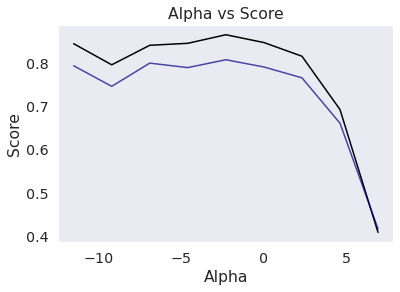

Text(0.5, 1.0, 'Alpha vs Score')

In [0]:
# Training Logistic regression model and chekcing f1 score metric
alpha = [10 ** x for x in range(-5, 4)]
train_scores = [] # store train scores
test_scores = [] # store test scores

for i in alpha:
    lr = SGDClassifier(loss='log', penalty='l2', alpha=i, n_jobs=-1, random_state=25)
    lr.fit(X_train_encode,y_train)
    train_sc = f1_score(y_train,lr.predict(X_train_encode),average='macro')
    test_sc = f1_score(y_test,lr.predict(X_test_encode),average='macro')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Alpha = ',i,'Train Score',train_sc,'test Score',test_sc)
    
# plotting the scores vs parameters
plt.plot(np.log(alpha),train_scores,label='Train Score',color='black')
plt.plot(np.log(alpha),test_scores,label='Test Score',color='#000080',alpha=0.7)
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.grid()
plt.title('Alpha vs Score')

In [0]:
#SGDClassifier is an optimizer which is used for hyperparameter tuning and optimizing machine learning algorithms like logistic regression , SVM, etc.
#We can tune various hyperparameters (if we don't know the best parameter for our algorithm) using SGD.
#SGD is mostly used with GridSearchCV or RandomizedSearchCV.
#SGD is a type of gradient descent(optimization of algorithm used) known as Stochastic Gradient Descent.

In [0]:
# Parameter tuning of Logistic regression using RandomisedSearch CV technique
sgd = SGDClassifier(loss='log', n_jobs=-1, random_state=25)
 
prams={ 'alpha': [10 ** x for x in range(-5, 4)] }

random_cfl1 = RandomizedSearchCV(sgd,param_distributions=prams,verbose=10,scoring='f1_macro',n_jobs=-1,random_state=25,
                               return_train_score=True)
random_cfl1.fit(X_train_encode,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
 warnings.warn(
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1 tasks | elapsed: 27.0s
[Parallel(n_jobs=-1)]: Done 4 tasks | elapsed: 50.9s
[Parallel(n_jobs=-1)]: Done 9 tasks | elapsed: 1.4min
[Parallel(n_jobs=-1)]: Done 14 tasks | elapsed: 1.7min
[Parallel(n_jobs=-1)]: Done 21 tasks | elapsed: 1.8min
[Parallel(n_jobs=-1)]: Done 28 tasks | elapsed: 1.9min
[Parallel(n_jobs=-1)]: Done 37 tasks | elapsed: 1.9min
[Parallel(n_jobs=-1)]: Done 45 out of 45 | elapsed: 2.0min finished
mean test scores [0.77954037 0.82464795 0.79531761 0.84851061 0.85789039 0.84909808
 0.82054623 0.69734003 0.44321019]
mean train scores [0.78010302 0.82642554 0.79915085 0.84833111 0.85857969 0.84943336
 0.82049867 0.69763512 0.44331004]

In [0]:
# printing best parameters and score
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters: {'alpha': 0.1}
Best Score: 0.8578903922151493

In [0]:
# Fitting LogisticRegression mpdel on best parameters
sgd = SGDClassifier(loss='log', alpha=0.1, n_jobs=-1, random_state=25)
sgd.fit(X_train_encode,y_train)

y_train_pred = sgd.predict(X_train_encode)
y_test_pred = sgd.predict(X_test_encode)

# printing train and test scores 
print('Train f1 score: ',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score: ',f1_score(y_test,y_test_pred,average='macro'))
print('Accuracy score',accuracy_score(y_test_pred,y_test)*100)
print('ROC_AUC score',roc_auc_score(y_test_pred,y_test)*100)

Train f1 score: 0.8647880204053072
Test f1 score: 0.8071698875162531
Accuracy score 90.82823505218241
ROC_AUC score 82.15143875317918

In [0]:
#Without auto-encoder and ANN , the f1 score was around 46% but now it is 90% (almost double.)
#Accuracy of logistic regression model after preprocessing of data is 91%
#In confusion matrix , we can see that we have high no. of true positives and true negatives which means our predictions are good.

In [0]:
print(confusion_matrix(y_test,y_test_pred))

[[ 1791 1031]
 [ 753 15876]]

Alpha = 1e-05 Train Score 0.84734279587352 test Score 0.7923008469068402
Alpha = 0.0001 Train Score 0.8059916981357595 test Score 0.7578428624607678
Alpha = 0.001 Train Score 0.8455860325445372 test Score 0.795046573822612
Alpha = 0.01 Train Score 0.8556944872586956 test Score 0.7988019610765843
Alpha = 0.1 Train Score 0.8528223584663908 test Score 0.792634960888374
Alpha = 1 Train Score 0.8492027262588175 test Score 0.7912564781529239
Alpha = 10 Train Score 0.8282444292731885 test Score 0.7774710678230141
Alpha = 100 Train Score 0.7110993053178148 test Score 0.6783139627360959
Alpha = 1000 Train Score 0.43884380661914596 test Score 0.4408677714291058
Out[172]:

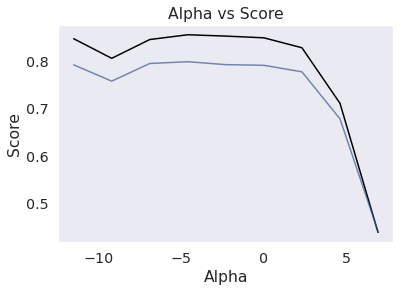

Text(0.5, 1.0, 'Alpha vs Score')

In [0]:
#svc = LinearSVC(random_state=25)
#svc.fit(X_train_encode, y_train)
#y_pred_svc = svc.predict(X_test_encode)
alpha = [10 ** x for x in range(-5, 4)]
train_scores = [] # store train scores
test_scores = [] # store test scores

for i in alpha:
    svc = SGDClassifier(loss='hinge', penalty='l2', alpha=i, n_jobs=-1, random_state=25)
    svc.fit(X_train_encode,y_train)
    train_svc = f1_score(y_train,svc.predict(X_train_encode),average='macro')
    test_svc = f1_score(y_test,svc.predict(X_test_encode),average='macro')
    test_scores.append(test_svc)
    train_scores.append(train_svc)
    print('Alpha = ',i,'Train Score',train_svc,'test Score',test_svc)
    
# plotting the scores vs parameters
plt.plot(np.log(alpha),train_scores,label='Train Score',color='black')
plt.plot(np.log(alpha),test_scores,label='Test Score',color='#425a90',alpha=0.7)
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.grid()
plt.title('Alpha vs Score')

In [0]:
sgd = SGDClassifier(loss='hinge', n_jobs=-1, random_state=25)
 
prams={ 'alpha': [10 ** x for x in range(-5, 4)] }

random_cfl1_svc = RandomizedSearchCV(sgd,param_distributions=prams,verbose=10,scoring='f1_macro',n_jobs=-1,random_state=25,
                               return_train_score=True)
random_cfl1_svc.fit(X_train_encode,y_train)

print('mean test scores',random_cfl1_svc.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1_svc.cv_results_['mean_train_score'])

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
 warnings.warn(
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1 tasks | elapsed: 15.2s
[Parallel(n_jobs=-1)]: Done 4 tasks | elapsed: 25.9s
[Parallel(n_jobs=-1)]: Done 9 tasks | elapsed: 51.4s
[Parallel(n_jobs=-1)]: Done 14 tasks | elapsed: 1.0min
[Parallel(n_jobs=-1)]: Done 21 tasks | elapsed: 1.1min
[Parallel(n_jobs=-1)]: Done 28 tasks | elapsed: 1.2min
[Parallel(n_jobs=-1)]: Done 37 tasks | elapsed: 1.2min
[Parallel(n_jobs=-1)]: Done 45 out of 45 | elapsed: 1.2min finished
mean test scores [0.8314338 0.82403221 0.83083488 0.8499588 0.85803 0.8562719
 0.83922768 0.73362741 0.46087005]
mean train scores [0.83187222 0.82503773 0.83079236 0.85108099 0.85810005 0.85669458
 0.83933625 0.73361169 0.46086818]

In [0]:
print("Best Parameters: ",random_cfl1_svc.best_params_)
print("Best Score: ",random_cfl1_svc.best_score_)

Best Parameters: {'alpha': 0.1}
Best Score: 0.8580300029534275

In [0]:
sgd = SGDClassifier(loss='hinge', alpha=0.1, n_jobs=-1, random_state=25)
sgd.fit(X_train_encode,y_train)

y_train_svc_pred = sgd.predict(X_train_encode)
y_test_svc_pred = sgd.predict(X_test_encode)

In [0]:
print('Train f1 score: ',f1_score(y_train,y_train_svc_pred,average='macro'))
print('Test f1 score: ',f1_score(y_test,y_test_svc_pred,average='macro'))
print('Accuracy score',accuracy_score(y_test_svc_pred,y_test)*100)
print('ROC_AUC score',roc_auc_score(y_test_svc_pred,y_test)*100)

Train f1 score: 0.8528223584663908
Test f1 score: 0.792634960888374
Accuracy score 90.90021078607784
ROC_AUC score 84.1371275945882

In [0]:
#linear svc has less accuracy than logistic regression.

In [0]:
print(confusion_matrix(y_test,y_test_svc_pred))

[[ 1555 1267]
 [ 503 16126]]

Depth = 1 Train Score 0.8349094755668947 test Score 0.7802258161760138
Depth = 3 Train Score 0.8569324686099388 test Score 0.7911242984280911
Depth = 5 Train Score 0.8676308179007703 test Score 0.7973461838162563
Depth = 7 Train Score 0.8807001151541503 test Score 0.8063918217343434
Depth = 10 Train Score 0.8952810616396856 test Score 0.7992001012385355
Depth = 30 Train Score 0.9573508900434257 test Score 0.7689820666087657
Depth = 50 Train Score 0.9606102461249006 test Score 0.7655607069016872
Depth = 100 Train Score 0.9606354202177355 test Score 0.764999797835161
Depth = 250 Train Score 0.9606354202177355 test Score 0.764999797835161
Depth = 500 Train Score 0.9606354202177355 test Score 0.764999797835161

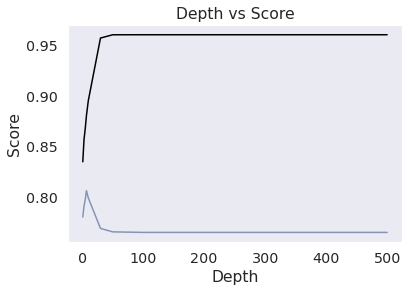

In [0]:
depth = [1,3,5,7,10,30,50,100,250,500]
train_scores = []
test_scores = []
for i in depth:
    clf = DecisionTreeClassifier(max_depth=i,random_state=25)
    clf.fit(X_train_encode,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train_encode),average='macro')
    test_sc = f1_score(y_test,clf.predict(X_test_encode),average='macro')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Depth = ',i,'Train Score',train_sc,'test Score',test_sc)

# plotting the score vs depth
plt.plot(depth,train_scores,label='Train Score',color='black')
plt.plot(depth,test_scores,label='Test Score',color='#425a90',alpha=0.6)
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs Score')
plt.grid()
plt.show()

In [0]:
dt = DecisionTreeClassifier(random_state=25)

params = { "max_depth": sp_randint(3,500), "min_samples_split": sp_randint(50,200), "min_samples_leaf": sp_randint(2,50)}

random_cfl1 = RandomizedSearchCV(dt, param_distributions=params,verbose=10,scoring='f1_macro',n_jobs=-1,random_state=25,
                               return_train_score=True)
random_cfl1.fit(X_train_encode,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1 tasks | elapsed: 18.7s
[Parallel(n_jobs=-1)]: Done 4 tasks | elapsed: 41.0s
[Parallel(n_jobs=-1)]: Done 9 tasks | elapsed: 1.7min
[Parallel(n_jobs=-1)]: Done 14 tasks | elapsed: 2.6min
[Parallel(n_jobs=-1)]: Done 21 tasks | elapsed: 3.9min
[Parallel(n_jobs=-1)]: Done 28 tasks | elapsed: 5.2min
[Parallel(n_jobs=-1)]: Done 37 tasks | elapsed: 7.2min
[Parallel(n_jobs=-1)]: Done 46 tasks | elapsed: 8.7min
[Parallel(n_jobs=-1)]: Done 50 out of 50 | elapsed: 9.3min finished
mean test scores [0.86685173 0.86629398 0.86364975 0.86554684 0.86228876 0.86219045
 0.85702962 0.86457429 0.86672464 0.86596279]
mean train scores [0.87988749 0.88004113 0.88584529 0.8799138 0.88636108 0.88681408
 0.89986719 0.88504433 0.88170052 0.88361801]

In [0]:
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters: {'max_depth': 135, 'min_samples_leaf': 28, 'min_samples_split': 193}
Best Score: 0.8668517325696847

In [0]:
dt = DecisionTreeClassifier(max_depth = 135, min_samples_leaf = 28, min_samples_split = 193,random_state=25)
dt.fit(X_train_encode,y_train)

y_dt_train_pred = dt.predict(X_train_encode)
y_dt_test_pred = dt.predict(X_test_encode)

# printing train test score
print('Train f1 score',f1_score(y_train,y_dt_train_pred,average='macro'))
print('Test f1 score',f1_score(y_test,y_dt_test_pred,average='macro'))
print('Accuracy',accuracy_score(y_dt_test_pred,y_test)*100)
print('roc auc core',roc_auc_score(y_dt_test_pred,y_test)*100)

Train f1 score 0.8793991378333526
Test f1 score 0.7970718058022107
Accuracy 90.73055369903861
roc auc core 82.71206777958145

In [0]:
print(confusion_matrix(y_test,y_dt_test_pred))

[[ 1656 1166]
 [ 637 15992]]

Estimators = 5 Train Score 0.867464024317179 test Score 0.8016289217990342
Estimators = 10 Train Score 0.8696588952823124 test Score 0.8018646576720112
Estimators = 15 Train Score 0.8678228058309223 test Score 0.7998983989755638
Estimators = 20 Train Score 0.8683463844567385 test Score 0.8012596343566823
Estimators = 25 Train Score 0.8685477339998441 test Score 0.8013128283314167
Estimators = 50 Train Score 0.8688207519624424 test Score 0.8011394873387147
Estimators = 100 Train Score 0.8682310888364662 test Score 0.7998145139880546
Estimators = 250 Train Score 0.8682091831616693 test Score 0.8006312401031628
Estimators = 500 Train Score 0.8680839709325832 test Score 0.8010726273982023

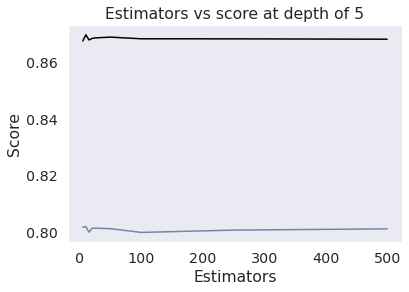

In [0]:
estimators = [5,10,15,20,25,50,100,250,500]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(X_train_encode,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train_encode),average='macro')
    test_sc = f1_score(y_test,clf.predict(X_test_encode),average='macro')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score',color='black')
plt.plot(estimators,test_scores,label='Test Score',color='#425a90',alpha=0.7)
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')
plt.grid()

depth = 3 Train Score 0.84526406556397 test Score 0.7845992002578257
depth = 9 Train Score 0.8792895344811991 test Score 0.8028127400538527
depth = 11 Train Score 0.8808640771136427 test Score 0.8029413961488102
depth = 15 Train Score 0.8814927191437036 test Score 0.80256936095475
depth = 20 Train Score 0.8815838278155337 test Score 0.8026546072529704
depth = 35 Train Score 0.8809946193803236 test Score 0.8028568461541656
depth = 50 Train Score 0.8811312325366252 test Score 0.8030649272564936
depth = 70 Train Score 0.8811312325366252 test Score 0.8030649272564936
depth = 130 Train Score 0.8811312325366252 test Score 0.8030649272564936

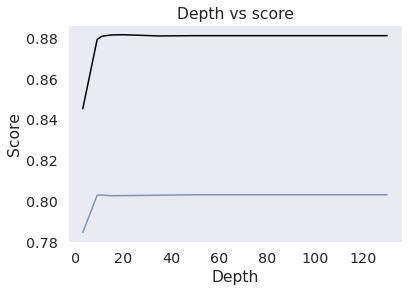

In [0]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(X_train_encode,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train_encode),average='macro')
    test_sc = f1_score(y_test,clf.predict(X_test_encode),average='macro')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score',color='black')
plt.plot(depths,test_scores,label='Test Score',color='#425a90',alpha=0.6)
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score')
plt.grid()
plt.show()

In [0]:
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1_macro',random_state=25,return_train_score=True )

rf_random.fit(X_train_encode,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.87397445 0.87364374 0.87313358 0.8735699 0.87442029]
mean train scores [0.88104955 0.88119171 0.87930169 0.87971017 0.883136 ]

In [0]:
print("Best Parameters: ",rf_random.best_params_)
print("Best Score: ",rf_random.best_score_)

Best Parameters: {'max_depth': 14, 'min_samples_leaf': 28, 'min_samples_split': 111, 'n_estimators': 121}
Best Score: 0.8744202853761921

In [0]:
rf_classifier = RandomForestClassifier(max_depth = 14, min_samples_leaf = 28, min_samples_split = 111, n_estimators = 121,random_state=25,
                           n_jobs=-1)
rf_classifier.fit(X_train_encode,y_train)

y_train_rf_pred = rf_classifier.predict(X_train_encode)
y_test_rf_pred = rf_classifier.predict(X_test_encode)

# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_rf_pred,average='macro'))
print('Test f1 score',f1_score(y_test,y_test_rf_pred,average='macro'))
print('Accuracy',accuracy_score(y_test_rf_pred,y_test)*100)
print('roc auc core',roc_auc_score(y_test_rf_pred,y_test)*100)

Train f1 score 0.8826549238475259
Test f1 score 0.8027483354416443
Accuracy 90.8899285383785
roc auc core 82.85507958892032

In [0]:
#In Random forest we have 91% accuracy.

In [0]:
print(confusion_matrix(y_test,y_test_rf_pred))

[[ 1705 1117]
 [ 655 15974]]

Estimators = 1 Train Score 0.4608849900913261 test Score 0.46089246119733923
Estimators = 3 Train Score 0.4608849900913261 test Score 0.46089246119733923
Estimators = 5 Train Score 0.4609767497658723 test Score 0.46089246119733923
Estimators = 10 Train Score 0.8627661403055069 test Score 0.7839640022551194
Estimators = 50 Train Score 0.8884704003052613 test Score 0.8018706396602224
Estimators = 100 Train Score 0.8933738107847218 test Score 0.8016995710270294
Estimators = 250 Train Score 0.9180574820184941 test Score 0.8013931089296715
Estimators = 500 Train Score 0.9490659253100007 test Score 0.7984205403527471
Estimators = 1000 Train Score 0.9582888448141772 test Score 0.7964630624063689

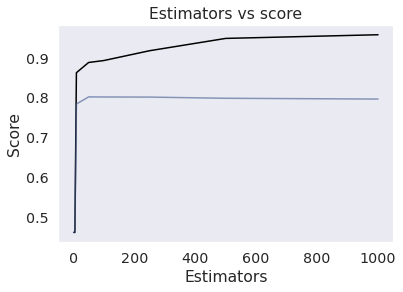

In [0]:
# Variation of score with estimators used in LGBM with other parameters set to default value
estimators = [1,3,5,10,50,100,250,500,1000]
train_scores = []
test_scores = []
for i in estimators:
    clf = LGBMClassifier(n_estimators=i, n_jobs=-1,random_state=25)
    clf.fit(X_train_encode,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train_encode),average='macro')
    test_sc = f1_score(y_test,clf.predict(X_test_encode),average='macro')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score',color='black')
plt.plot(estimators,test_scores,label='Test Score',color='#425a90',alpha=0.6)
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score')
plt.grid()

In [0]:
x_cfl=LGBMClassifier(random_state=25,n_jobs=-1)

prams={
    'learning_rate':[0.001,0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[1,3,5,10,50,100,250,500,1000],
     'max_depth':[3,5,10,15,20,50],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,random_state=25,scoring='f1_macro',
                               return_train_score=True)
random_cfl1.fit(X_train_encode,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1 tasks | elapsed: 1.3min
[Parallel(n_jobs=-1)]: Done 4 tasks | elapsed: 2.6min
[Parallel(n_jobs=-1)]: Done 9 tasks | elapsed: 4.0min
[Parallel(n_jobs=-1)]: Done 14 tasks | elapsed: 4.7min
[Parallel(n_jobs=-1)]: Done 21 tasks | elapsed: 5.0min
[Parallel(n_jobs=-1)]: Done 28 tasks | elapsed: 5.3min
[Parallel(n_jobs=-1)]: Done 37 tasks | elapsed: 5.8min
[Parallel(n_jobs=-1)]: Done 46 tasks | elapsed: 6.2min
[Parallel(n_jobs=-1)]: Done 50 out of 50 | elapsed: 6.3min finished
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
mean test scores [0.8704419 0.87514401 0.87472605 0.87394998 0.46088499 0.87350533
 0.87243934 0.46088499 0.82557854 0.46088499]
mean train scores [0.93977428 0.88721588 0.88415172 0.89497661 0.46088499 0.89957645
 0.87731155 0.46088499 0.83169641 0.46088499]

In [0]:
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.1}
Best Score: 0.8751440054470109

In [0]:
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.1}
Best Score: 0.8751440054470109

In [0]:
# Fitting the model on best parameters
lgbm = LGBMClassifier(n_estimators=500, max_depth=3,subsample=1,learning_rate=0.05,colsample_bytree=0.3,random_state=25,
                      n_jobs=-1)
lgbm.fit(X_train_encode,y_train)


y_train_lgbm_pred = lgbm.predict(X_train_encode)
y_test_lgbm_pred = lgbm.predict(X_test_encode)

# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_lgbm_pred,average='macro'))
print('Test f1 score',f1_score(y_test,y_test_lgbm_pred,average='macro'))
print('Accuracy',accuracy_score(y_test_lgbm_pred,y_test)*100)
print('roc auc core',roc_auc_score(y_test_lgbm_pred,y_test)*100)

Train f1 score 0.882710060643973
Test f1 score 0.8029995660867191
Accuracy 90.84365842373143
roc auc core 82.61697759554009

In [0]:
print(confusion_matrix(y_test,y_test_lgbm_pred))

[[ 1720 1102]
 [ 679 15950]]

In [0]:
import random
clf = XGBClassifier()
param_dist = {"n_estimators":sp_randint(105,125),
              "eta":[round(random.uniform(0.1, 1.0 ), 1) for i in range(0,20)]
              }
xg_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=3,scoring='f1_macro',random_state=25,return_train_score=True)


xg_random.fit(X_train_encode,y_train)
print('mean test scores',xg_random.cv_results_['mean_test_score'])
print('mean train scores',xg_random.cv_results_['mean_train_score'])

/databricks/python/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
 warnings.warn(label_encoder_deprecation_msg, UserWarning)
[16:14:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:24:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:33:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:35:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:39:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:41:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:45:04] WARN

In [0]:
print(xg_random.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
 colsample_bynode=1, colsample_bytree=1, eta=0.6, gamma=0,
 gpu_id=-1, importance_type='gain', interaction_constraints='',
 learning_rate=0.600000024, max_delta_step=0, max_depth=6,
 min_child_weight=1, missing=nan, monotone_constraints='()',
 n_estimators=109, n_jobs=2, num_parallel_tree=1, random_state=0,
 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
 tree_method='exact', validate_parameters=1, verbosity=None)

In [0]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=120, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [0]:
clf.fit(X_train_encode,y_train)
y_train_xgb_pred = clf.predict(X_train_encode)
y_test_xgb_pred = clf.predict(X_test_encode)

/databricks/python/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
 warnings.warn(label_encoder_deprecation_msg, UserWarning)
[16:50:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

In [0]:
print('Train f1 score',f1_score(y_train,y_train_xgb_pred,average='macro'))
print('Test f1 score',f1_score(y_test,y_test_xgb_pred,average='macro'))
print('Accuracy',accuracy_score(y_test,y_test_xgb_pred)*100)
print('roc auc core',roc_auc_score(y_test,y_test_xgb_pred)*100)

Train f1 score 0.8986216927478706
Test f1 score 0.7999806620451229
Accuracy 90.70484807979025
roc auc core 78.14608712358961

In [0]:
print(confusion_matrix(y_test,y_test_xgb_pred))

[[ 1706 1116]
 [ 692 15937]]

In [0]:
x_cfl=AdaBoostClassifier(random_state=25)

prams={
    'learning_rate':[0.001,0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[1,3,5,10,50,100,250,500,1000]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,random_state=25,scoring='f1_macro',
                               return_train_score=True)
random_cfl1.fit(X_train_encode,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1 tasks | elapsed: 10.3s
[Parallel(n_jobs=-1)]: Done 4 tasks | elapsed: 18.3s
[Parallel(n_jobs=-1)]: Done 9 tasks | elapsed: 25.5s
[Parallel(n_jobs=-1)]: Done 14 tasks | elapsed: 3.0min
[Parallel(n_jobs=-1)]: Done 21 tasks | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 28 tasks | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 37 tasks | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 46 tasks | elapsed: 61.2min
[Parallel(n_jobs=-1)]: Done 50 out of 50 | elapsed: 82.2min finished
mean test scores [0.7945182 0.81476907 0.79711324 0.79707207 0.78900722 0.79371226
 0.8059102 0.85994048 0.79443603 0.86160388]
mean train scores [0.79549006 0.81498519 0.7977395 0.79772958 0.79008372 0.79441131
 0.8061248 0.86137202 0.79500039 0.86265912]

In [0]:
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters: {'n_estimators': 500, 'learning_rate': 0.05}
Best Score: 0.8616038763259997

In [0]:
# Fitting the model on best parameters
ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.05, random_state=25)
ada.fit(X_train_encode,y_train)

y_train_ada_pred = ada.predict(X_train_encode)
y_test_ada_pred = ada.predict(X_test_encode)

# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_ada_pred,average='macro'))
print('Test f1 score',f1_score(y_test,y_test_ada_pred,average='macro'))

Train f1 score 0.8621389412609726
Test f1 score 0.7999068815743611

In [0]:
print('Accuracy',accuracy_score(y_test_ada_pred,y_test)*100)
print('roc auc core',roc_auc_score(y_test_ada_pred,y_test)*100)

Accuracy 90.82823505218241
roc auc core 82.87070503914536

In [0]:
print(confusion_matrix(y_test,y_test_ada_pred))

[[ 1676 1146]
 [ 638 15991]]

In [0]:
learning_rate = [0.001,0.01,0.1]
max_depth = [5,10]

#Loop for the Tuning
for lr in learning_rate:
    for n in max_depth:
        clf = CatBoostClassifier(learning_rate=lr,max_depth = n,verbose = False)

        clf.fit(X_train_encode,y_train)

        Y_pred = clf.predict(X_train_encode)
        y_pred = clf.predict(X_test_encode)
        print(f"Train f1 score at learning rate {lr} and max_depth {n} is {f1_score(y_train, Y_pred,average='macro')}")
        print(f"Test f1 score at learning rate {lr} and max_depth {n} is {f1_score(y_test, y_pred,average='macro')}")
        print("-"*50)

Train f1 score at learning rate 0.001 and max_depth 5 is 0.8742096346018497
Test f1 score at learning rate 0.001 and max_depth 5 is 0.8031190840561452
--------------------------------------------------
Train f1 score at learning rate 0.001 and max_depth 10 is 0.8786722728161989
Test f1 score at learning rate 0.001 and max_depth 10 is 0.8031720979460619
--------------------------------------------------
Train f1 score at learning rate 0.01 and max_depth 5 is 0.8814954500455534
Test f1 score at learning rate 0.01 and max_depth 5 is 0.8051520742812928
--------------------------------------------------
Train f1 score at learning rate 0.01 and max_depth 10 is 0.9019986345571078
Test f1 score at learning rate 0.01 and max_depth 10 is 0.8026444143920846
--------------------------------------------------
Train f1 score at learning rate 0.1 and max_depth 5 is 0.9121947783930369
Test f1 score at learning rate 0.1 and max_depth 5 is 0.7999233058908675
--------------------------------------------------
Train f1 score at learning rate 0.1 and max_depth 10 is 0.9573874059178751
Test f1 score at learning rate 0.1 and max_depth 10 is 0.7984969923650007
--------------------------------------------------

In [0]:
n_estimators = [100,200,500]
class_weights = [{0:1,1:2},{0:1,1:4},{0:1,1:6}]

#Loop for the Tuning
for n in n_estimators:
    for l in class_weights:
        clf = CatBoostClassifier(learning_rate=0.1,max_depth = 10,n_estimators = n,class_weights = l,verbose = False)
        clf.fit(X_train_encode,y_train)

        #y_pred = (clf.predict_proba(X_test)[:, 1] >= 0.21).astype('int')
        y_train_pred = clf.predict(X_train_encode)
        y_test_pred= clf.predict(X_test_encode)
        print(f"Train f1 score at n_estimators {n} and  class_weights {l} is {f1_score(y_train, y_train_pred,average='macro')}")
        print(f"Test f1 score at n_estimators {n} and class_weights {l} is {f1_score(y_test, y_test_pred,average='macro')}")
        print("-"*50)

Train f1 score at n_estimators 100 and class_weights {0: 1, 1: 2} is 0.890238624912988
Test f1 score at n_estimators 100 and class_weights {0: 1, 1: 2} is 0.7903558818561525
--------------------------------------------------
Train f1 score at n_estimators 100 and class_weights {0: 1, 1: 4} is 0.8673035059769979
Test f1 score at n_estimators 100 and class_weights {0: 1, 1: 4} is 0.7692134119263911
--------------------------------------------------
Train f1 score at n_estimators 100 and class_weights {0: 1, 1: 6} is 0.849354957022435
Test f1 score at n_estimators 100 and class_weights {0: 1, 1: 6} is 0.7550187340918313
--------------------------------------------------
Train f1 score at n_estimators 200 and class_weights {0: 1, 1: 2} is 0.909474583142453
Test f1 score at n_estimators 200 and class_weights {0: 1, 1: 2} is 0.7923351353610956
--------------------------------------------------
Train f1 score at n_estimators 200 and class_weights {0: 1, 1: 4} is 0.8914415913234324
Test f1 score at n_estimators 200 and class_weights {0: 1, 1: 4} is 0.7750751052701368
--------------------------------------------------
Train f1 score at n_estimators 200 and class_weights {0: 1, 1: 6} is 0.8776509622510857
Test f1 score at n_estimators 200 and class_weights {0: 1, 1: 6} is 0.7675361736540125
--------------------------------------------------
Train f1 score at n_estimators 500 and class_weights {0: 1, 1: 2} is 0.9350757282277333
Test f1 score at n_estimators 500 and class_weights {0: 1, 1: 2} is 0.7918782899563239
--------------------------------------------------
Train f1 score at n_estimators 500 and class_weights {0: 1, 1: 4} is 0.9111042897906971
Test f1 score at n_estimators 500 and class_weights {0: 1, 1: 4} is 0.7801725838946829
--------------------------------------------------
Train f1 score at n_estimators 500 and class_weights {0: 1, 1: 6} is 0.897360164722146
Test f1 score at n_estimators 500 and class_weights {0: 1, 1: 6} is 0.7753152123575755
--------------------------------------------------

In [0]:
clf = CatBoostClassifier(learning_rate=0.01,max_depth = 10,n_estimators = 500,class_weights ={0: 1, 1: 2},verbose = False)
clf.fit(X_train_encode,y_train)

y_train_cat_pred = clf.predict(X_train_encode)
y_test_cat_pred = clf.predict(X_test_encode)

In [0]:
print('Train f1 score',f1_score(y_train,y_train_cat_pred,average='macro'))
print('Test f1 score',f1_score(y_test,y_test_cat_pred,average='macro'))
print('Accuracy',accuracy_score(y_test_cat_pred,y_test)*100)
print('roc auc core',roc_auc_score(y_test_cat_pred,y_test)*100)

Train f1 score 0.8773655818147339
Test f1 score 0.7869660644331149
Accuracy 90.68428358439155
roc auc core 83.6624972025514

In [0]:
print(confusion_matrix(y_test,y_test_cat_pred))

[[ 1524 1298]
 [ 514 16115]]

In [0]:
est0 = list()
est0.append(('lr', SGDClassifier(loss='log', alpha=0.1, n_jobs=-1, random_state=25)))
est0.append(('svm', SGDClassifier(loss='hinge', alpha=1, n_jobs=-1, random_state=25)))
est0.append(('dt', DecisionTreeClassifier(max_depth = 135, min_samples_leaf = 28, min_samples_split = 193,random_state=25)))
est0.append(('rf', RandomForestClassifier(max_depth = 14, min_samples_leaf = 28, min_samples_split = 111, n_estimators = 121,random_state=25,
                           n_jobs=-1)))
est0.append(('xgb', XGBClassifier(n_estimators=120, max_depth=6,subsample= 1,learning_rate=0.100000001,colsample_bytree=1,random_state=25,
                      n_jobs=2)))

In [0]:
est_final= SGDClassifier(loss='log',n_jobs=-1, random_state=25)

In [0]:
clf_stck = StackingClassifier(estimators=est0, final_estimator = est_final, n_jobs=-1)

clf_stck.fit(X_train_encode,y_train)


y_train_stck_pred = clf_stck.predict(X_train_encode)
y_test_stck_pred = clf_stck.predict(X_test_encode)

# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_stck_pred,average='macro'))
print('Test f1 score',f1_score(y_test,y_test_stck_pred,average='macro'))
print('Accuracy',accuracy_score(y_test_stck_pred,y_test)*100)
print('roc auc core',roc_auc_score(y_test_stck_pred,y_test)*100)

Train f1 score 0.8841322695420797
Test f1 score 0.7995606899097389
Accuracy 90.84879954758111
roc auc core 83.0074437595757

In [0]:
print(confusion_matrix(y_test,y_test_stck_pred))

[[ 1666 1156]
 [ 624 16005]]

In [0]:
est1 = list()
est1.append(('lr', SGDClassifier(loss='log', alpha=0.1, n_jobs=-1, random_state=25)))
est1.append(('dt', DecisionTreeClassifier(max_depth = 135, min_samples_leaf = 28, min_samples_split = 193,random_state=25)))
est1.append(('rf', RandomForestClassifier(max_depth = 14, min_samples_leaf = 28, min_samples_split = 111, n_estimators = 121,random_state=25,
                           n_jobs=-1)))
est1.append(('xgb', XGBClassifier(n_estimators=120, max_depth=6,subsample= 1,learning_rate=0.100000001,colsample_bytree=1,random_state=25,
                      n_jobs=2)))

In [0]:
vot_hard = VotingClassifier(estimators = est1, voting ='hard')
vot_hard.fit(X_train_encode, y_train)
y_train_hard_pred = vot_hard.predict(X_train_encode)
y_test_hard_pred = vot_hard.predict(X_test_encode)

# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_hard_pred,average='macro'))
print('Test f1 score',f1_score(y_test,y_test_hard_pred,average='macro'))
print('Accuracy',accuracy_score(y_test_hard_pred,y_test)*100)
print('roc auc core',roc_auc_score(y_test_hard_pred,y_test)*100)

/databricks/python/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
 warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:11:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train f1 score 0.8872954225311582
Test f1 score 0.80620447402229
Accuracy 90.84879954758111
roc auc core 82.3256469860605

In [0]:
print(confusion_matrix(y_test,y_test_hard_pred))

[[ 1770 1052]
 [ 728 15901]]

In [0]:
vot_soft = VotingClassifier(estimators = est1, voting ='soft')
vot_soft.fit(X_train_encode, y_train)
y_train_soft_pred = vot_soft.predict(X_train_encode)
y_test_soft_pred = vot_soft.predict(X_test_encode)

# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_soft_pred,average='macro'))
print('Test f1 score',f1_score(y_test,y_test_soft_pred,average='macro'))
print('Accuracy',accuracy_score(y_test_soft_pred,y_test)*100)
print('roc auc core',roc_auc_score(y_test_soft_pred,y_test)*100)

/databricks/python/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
 warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:15:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train f1 score 0.8856604492198835
Test f1 score 0.8033684490555998
Accuracy 90.81795280448306
roc auc core 82.46566497250885

In [0]:
print(confusion_matrix(y_test,y_test_soft_pred))

[[ 1732 1090]
 [ 696 15933]]

In [0]:
x = PrettyTable()
x.field_names = ["Model", "Hyper parameter", "test f1-Score"]
x.add_row(['logistic ','alpha=0.1',' 0.80716988'])
x.add_row(['Regression',' ',' '])
x.add_row([' ',' ',' '])
x.add_row(['Linear SVM','alpha=0.1',' 0.792634960888374'])
x.add_row([' ',' ',' '])
x.add_row(['Decision Tree','max_depth=135','0.7970718058022107'])
x.add_row([' ','min_samples_leaf= 28,min_samples_split=193',' '])
x.add_row([' ',' ',' '])
x.add_row(['Random Forest','max_depth =14, min_samples_leaf=28','0.802748'])
x.add_row([' ','min_samples_split =111,n_estimators=121',' '])
x.add_row([' ',' ',' '])
x.add_row(['XGBclassifier','n_estimators=120, max_depth=6','0.79998'])
x.add_row([' ','subsample=1,learning_rate=0.100000001,colsample_bytree=1',' '])
x.add_row([' ',' ',' '])
x.add_row(['LGBMClassifier','n_estimators=500, max_depth=10','0.802999'])
x.add_row([' ','subsample=0.5,learning_rate=0.01,colsample_bytree=0.1',' '])
x.add_row([' ',' ',' '])
x.add_row(['AdaBoost','n_estimators=500, learning_rate=0.05','0.7999068'])
x.add_row([' ',' ',' '])
x.add_row(['CATBoost','earning_rate=0.1,max_depth = 10','0.786966'])
x.add_row([' ','n_estimators = 500,class_weights ={0: 1, 1: 2}',' '])
x.add_row([' ',' ',' '])
x.add_row(['StackingClassifier','estimators=est0, final_estimator = est_final','0.786966'])
x.add_row([' ',' ',' '])
x.add_row(['VotingClassifier',' ',' '])
x.add_row(['vot_hard','estimators = est1, voting =hard','0.80620447'])
x.add_row(['vot_soft','estimators = est1, voting = soft','0.8033684'])
x.add_row([' ',' ',' '])
print(x)

+--------------------+----------------------------------------------------------+--------------------+
 Model | Hyper parameter | test f1-Score |
+--------------------+----------------------------------------------------------+--------------------+
 logistic | alpha=0.1 | 0.80716988 |
 Regression | | |
 | | |
 Linear SVM | alpha=0.1 | 0.792634960888374 |
 | | |
 Decision Tree | max_depth=135 | 0.7970718058022107 |
 | min_samples_leaf= 28,min_samples_split=193 | |
 | | |
 Random Forest | max_depth =14, min_samples_leaf=28 | 0.802748 |
 | min_samples_split =111,n_estimators=121 | |
 | | |
 XGBclassifier | n_estimators=120, max_depth=6 | 0.79998 |
 | subsample=1,learning_rate=0.100000001,colsample_bytree=1 | |
 | | |
 LGBMClassifier | n_estimators=500, max_depth=10 | 0.802999 |
 | subsample=0.5,learning_rate=0.01,colsample_bytree=0.1 | |
 | | |
 AdaBoost | n_estimators=500, learning_rate=0.05 | 0.7999068 |
 | | |
 CATBoost | earning_rate=0.1,max_depth = 10 | 0.786966 |
 | n_estimators = 500,class_weights ={0: 1, 1: 2} | |
 | | |
 StackingClassifier | estimators=est0, final_estimator = est_final | 0.786966 |
 | | |
 VotingClassifier | | |
 vot_hard | estimators = est1, voting =hard | 0.80620447 |
 vot_soft | estimators = est1, voting = soft | 0.8033684 |
 | | |
+--------------------+----------------------------------------------------------+--------------------+